# Kepler Timeseries2Score musification. Kepler Objects of Interest (KOI) catalog. Samples:1-100

Data download: https://archive.stsci.edu/pub/kepler/lightcurves/
#### ACKNOWLEDGMENT
This research includes data collected with the Kepler mission, obtained from the MAST data archive at the Space Telescope Science Institute (STScI). Funding for the Kepler mission is provided by the NASA Explorer Program and by the NASA Science Mission Directorate. STScI is operated by the Association of Universities for Research in Astronomy, Inc., under NASA contract NAS 5–26555.


In [1]:
import astropy
from astropy.timeseries import TimeSeries

from astropy import units as u
from astropy.timeseries import BoxLeastSquares
from astropy.stats import sigma_clipped_stats
from astropy.timeseries import aggregate_downsample

import matplotlib.pylab as plt
from scipy.signal import find_peaks

import numpy as np

import os
from pathlib import Path

import random

import time
from pythonosc import udp_client

import math
from math import log2, pow

## Checking the library

In [2]:
root = '## YOUR FOLDER PATH TO THE DOWNLOADED SPECTRA ##'

In [3]:
for path, subdirs, files in os.walk(root):
    for name in files:
        print([os.path.join(path, name)])

['/Volumes/WORK/DOCTORADO_UPM/KOI_Q0_long/kplr005966154-2009131105131_llc.fits']
['/Volumes/WORK/DOCTORADO_UPM/KOI_Q0_long/kplr002581316-2009131105131_llc.fits']
['/Volumes/WORK/DOCTORADO_UPM/KOI_Q0_long/kplr010363115-2009131105131_llc.fits']
['/Volumes/WORK/DOCTORADO_UPM/KOI_Q0_long/kplr001575873-2009131105131_llc.fits']
['/Volumes/WORK/DOCTORADO_UPM/KOI_Q0_long/kplr011250587-2009131105131_llc.fits']
['/Volumes/WORK/DOCTORADO_UPM/KOI_Q0_long/kplr008753657-2009131105131_llc.fits']
['/Volumes/WORK/DOCTORADO_UPM/KOI_Q0_long/kplr004840327-2009131105131_llc.fits']
['/Volumes/WORK/DOCTORADO_UPM/KOI_Q0_long/kplr003632418-2009131105131_llc.fits']
['/Volumes/WORK/DOCTORADO_UPM/KOI_Q0_long/kplr003230787-2009131105131_llc.fits']
['/Volumes/WORK/DOCTORADO_UPM/KOI_Q0_long/kplr009727765-2009131105131_llc.fits']
['/Volumes/WORK/DOCTORADO_UPM/KOI_Q0_long/kplr004365645-2009131105131_llc.fits']
['/Volumes/WORK/DOCTORADO_UPM/KOI_Q0_long/kplr003339538-2009131105131_llc.fits']
['/Volumes/WORK/DOCTORADO_UP

In [4]:
len(files)

801

In [5]:
file = [os.path.join(path, name)]
str = " " 
Ffile = (str.join(file))  

route = Path(Ffile)

Fname = route.with_suffix('')

In [6]:
NumSamp=100
sample = files [0:NumSamp]
sample

['kplr005966154-2009131105131_llc.fits',
 'kplr002581316-2009131105131_llc.fits',
 'kplr010363115-2009131105131_llc.fits',
 'kplr001575873-2009131105131_llc.fits',
 'kplr011250587-2009131105131_llc.fits',
 'kplr008753657-2009131105131_llc.fits',
 'kplr004840327-2009131105131_llc.fits',
 'kplr003632418-2009131105131_llc.fits',
 'kplr003230787-2009131105131_llc.fits',
 'kplr009727765-2009131105131_llc.fits',
 'kplr004365645-2009131105131_llc.fits',
 'kplr003339538-2009131105131_llc.fits',
 'kplr006366559-2009131105131_llc.fits',
 'kplr010534155-2009131105131_llc.fits',
 'kplr007124613-2009131105131_llc.fits',
 'kplr010384298-2009131105131_llc.fits',
 'kplr009391817-2009131105131_llc.fits',
 'kplr007584650-2009131105131_llc.fits',
 'kplr003733628-2009131105131_llc.fits',
 'kplr011773625-2009131105131_llc.fits',
 'kplr004164922-2009131105131_llc.fits',
 'kplr006199056-2009131105131_llc.fits',
 'kplr009898447-2009131105131_llc.fits',
 'kplr006307083-2009131105131_llc.fits',
 'kplr008241079-

## Periodogram analysis for each light curve

/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:28: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[i]:indices[i+1]]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:29: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[-1]:]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:28: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[i]:indices[i+1]]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:29: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[-1]:]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:28: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[i]:indices[i+1]]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.p

/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:28: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[i]:indices[i+1]]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:29: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[-1]:]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:28: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[i]:indices[i+1]]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:29: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[-1]:]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:28: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[i]:indices[i+1]]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.p

/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:28: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[i]:indices[i+1]]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:29: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[-1]:]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:28: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[i]:indices[i+1]]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:29: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[-1]:]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:28: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[i]:indices[i+1]]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.p

/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:28: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[i]:indices[i+1]]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:29: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[-1]:]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:28: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[i]:indices[i+1]]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:29: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[-1]:]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:28: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[i]:indices[i+1]]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.p

/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:28: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[i]:indices[i+1]]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:29: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[-1]:]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:28: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[i]:indices[i+1]]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:29: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[-1]:]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:28: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[i]:indices[i+1]]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.p

KOI represented: 100 curves


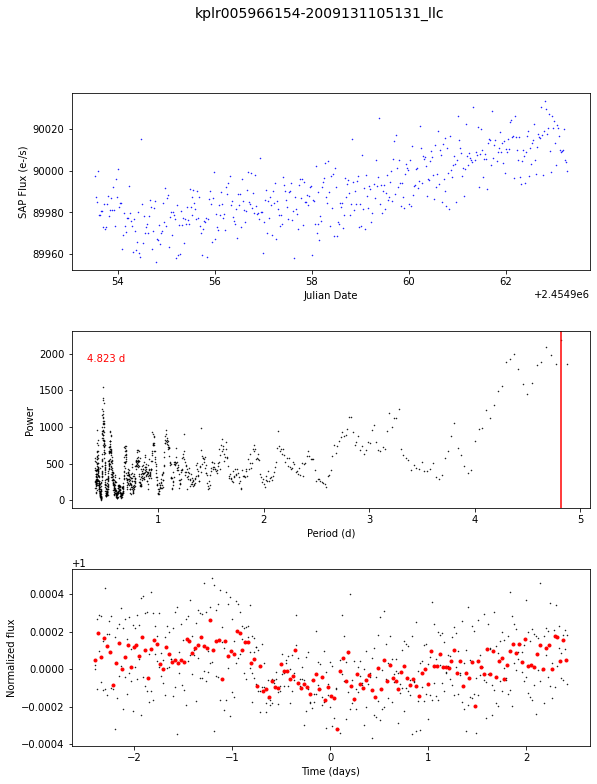

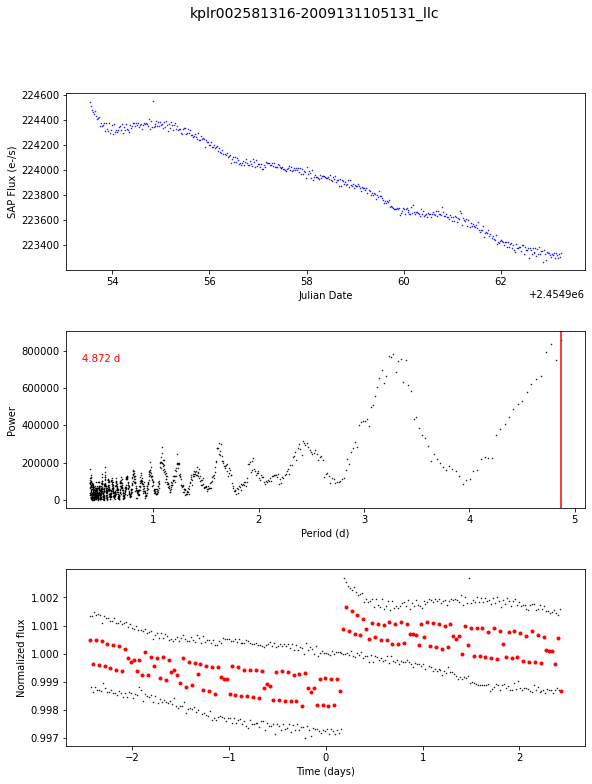

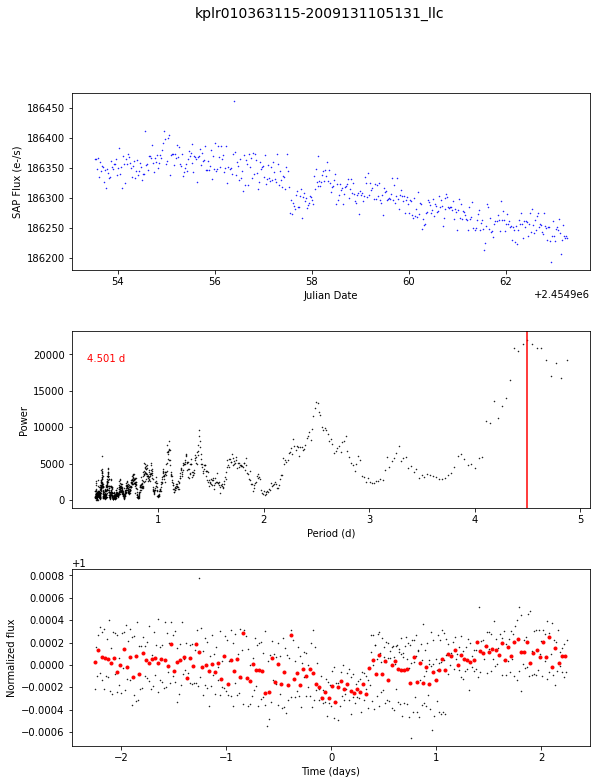

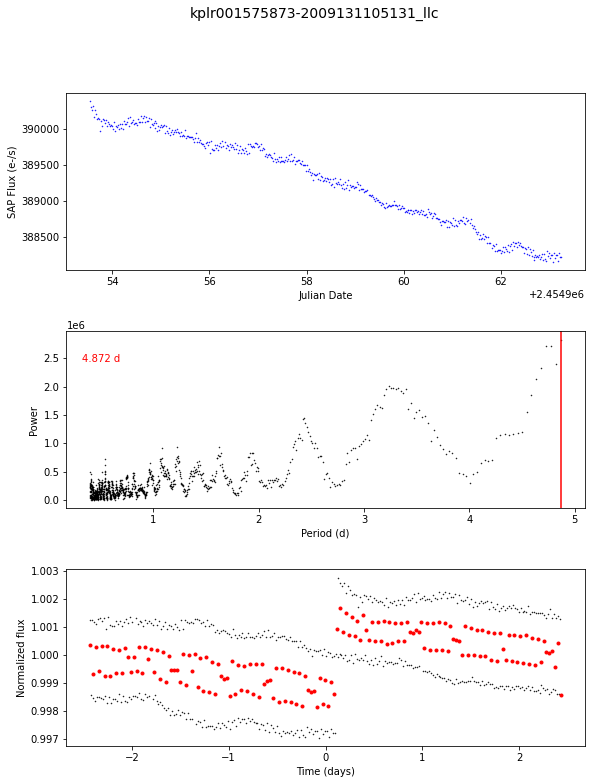

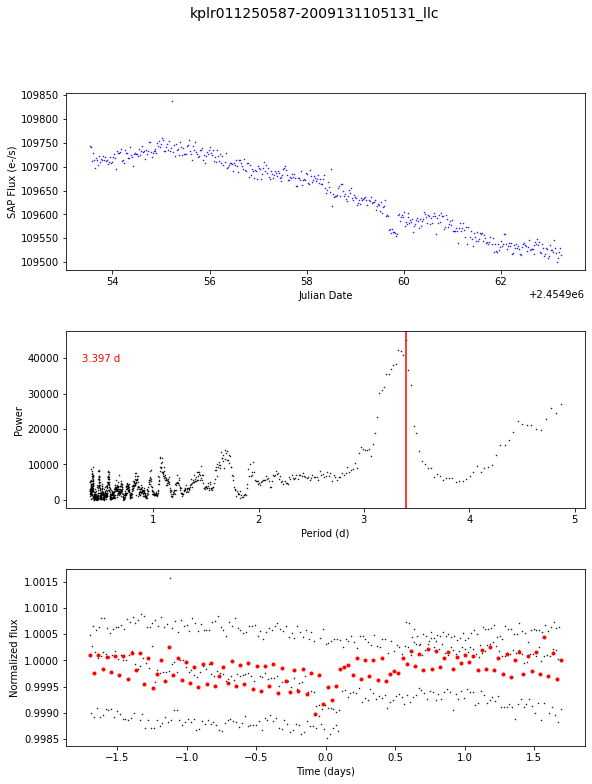

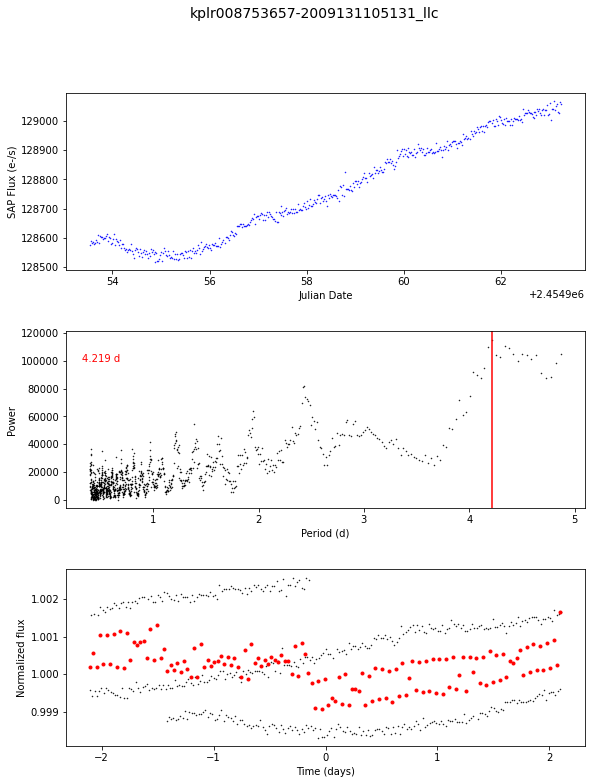

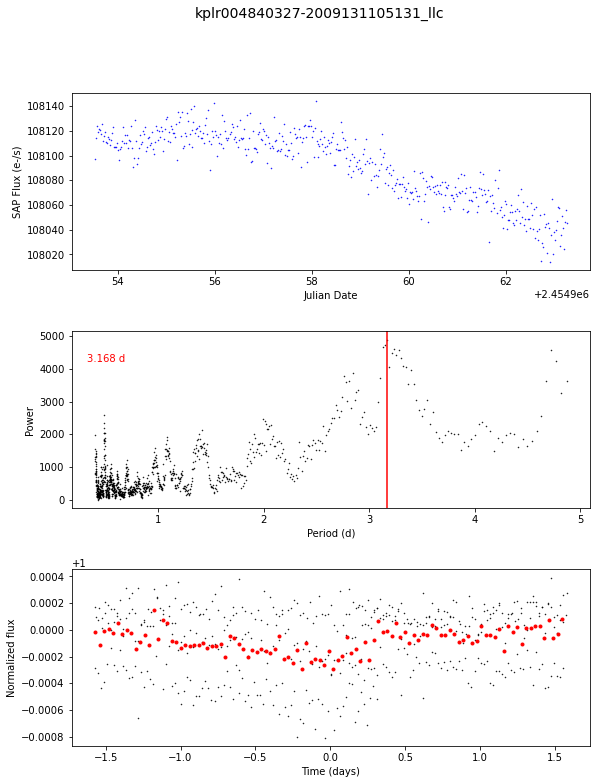

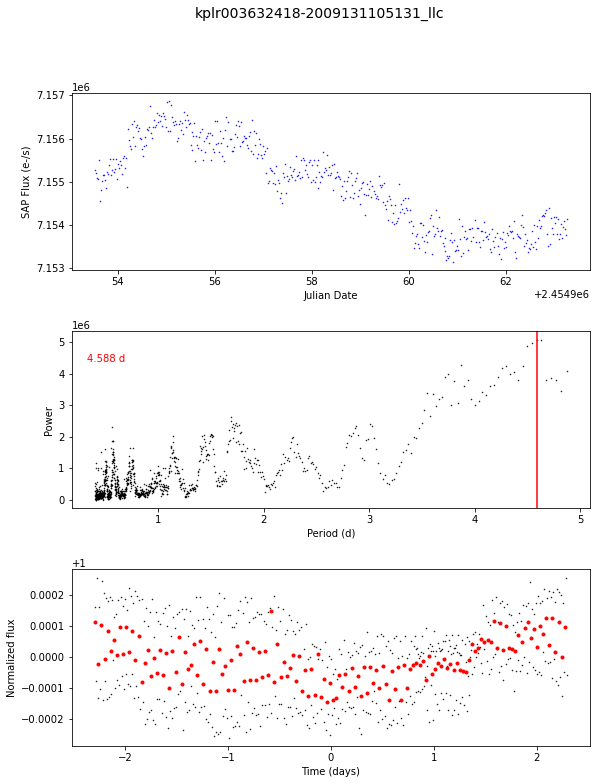

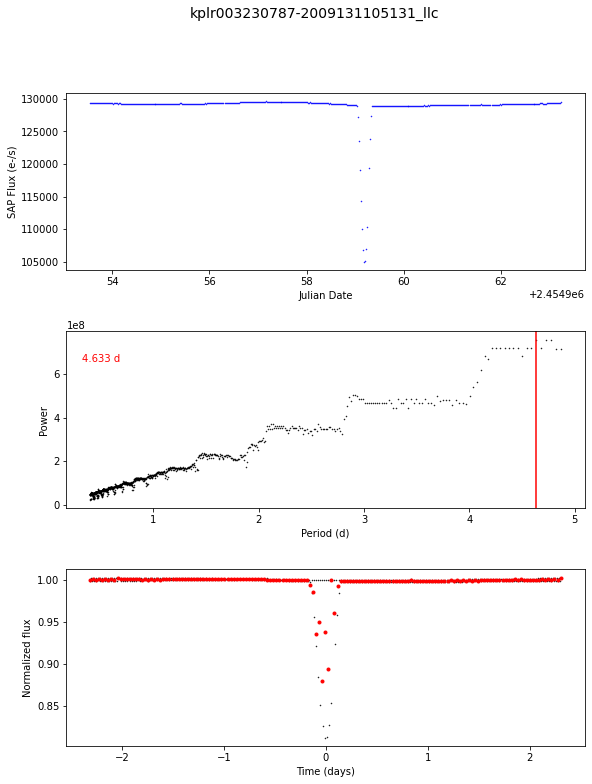

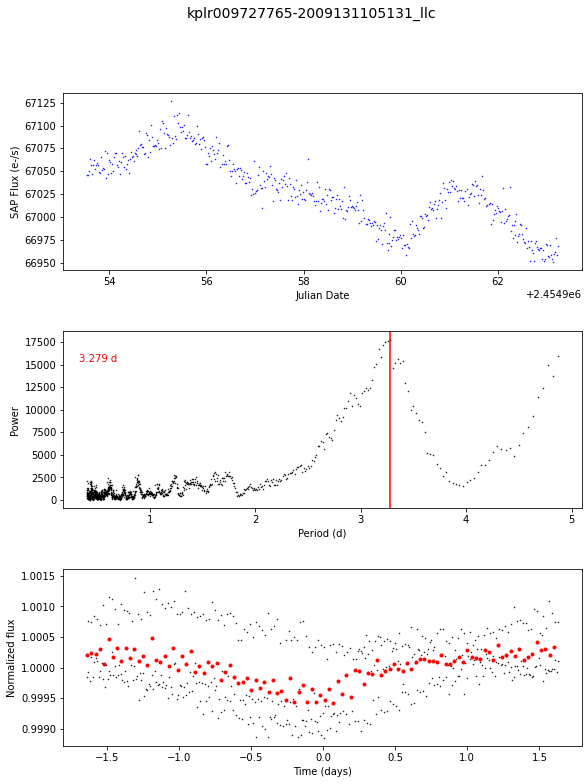

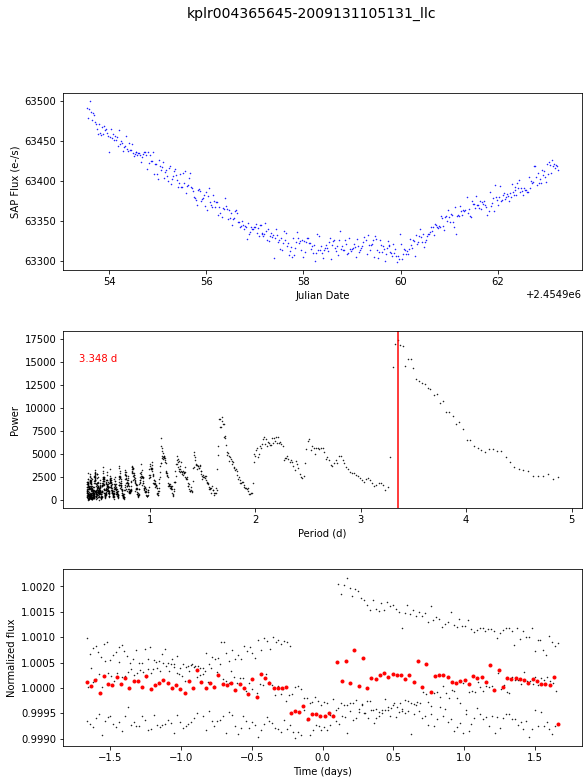

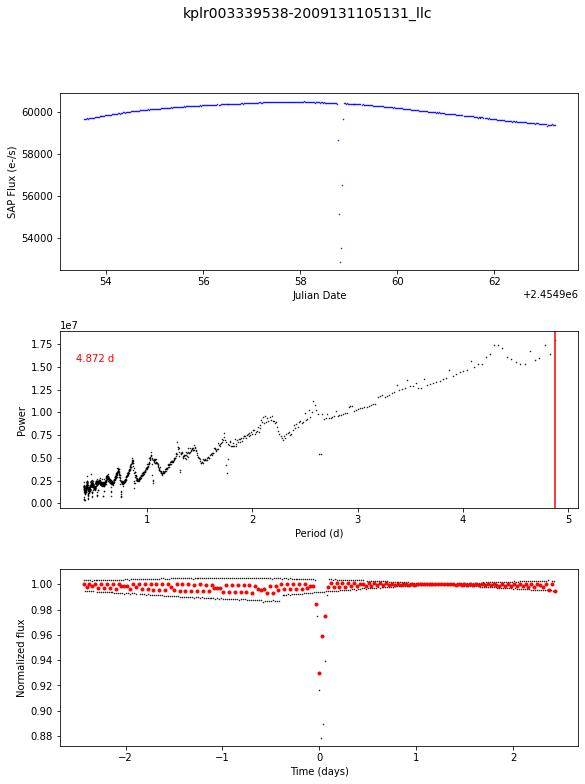

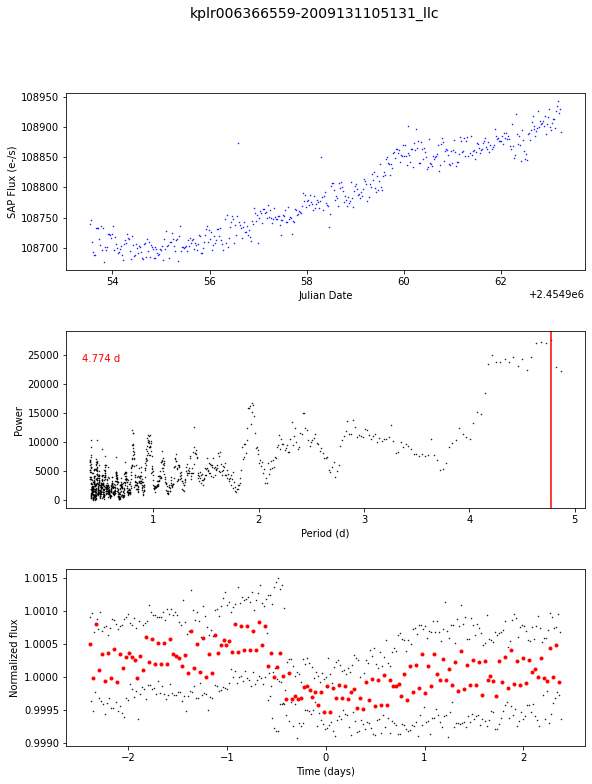

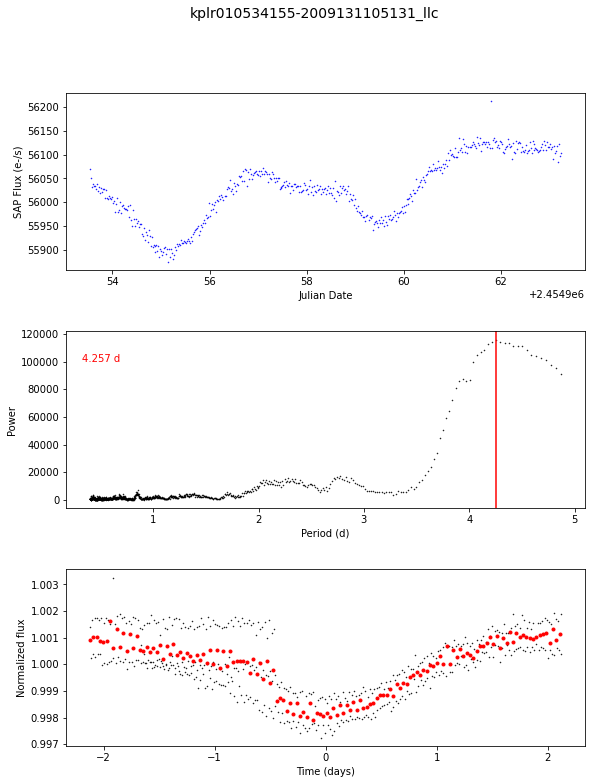

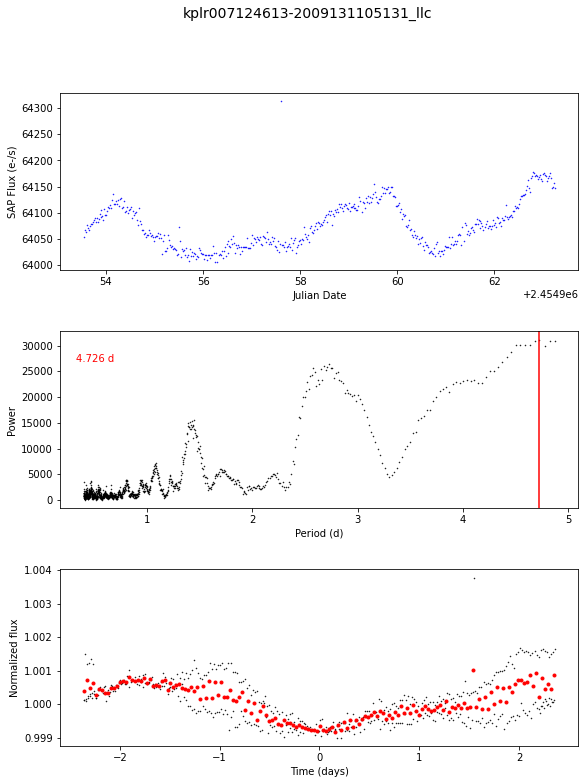

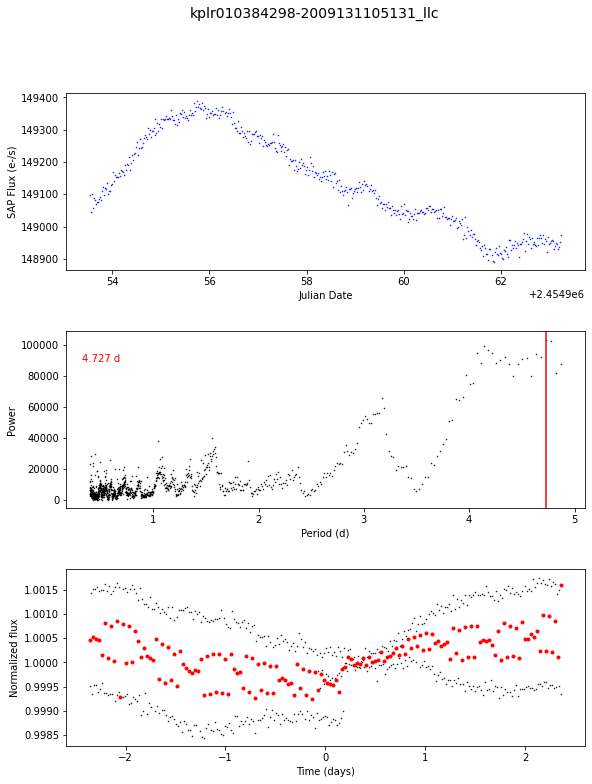

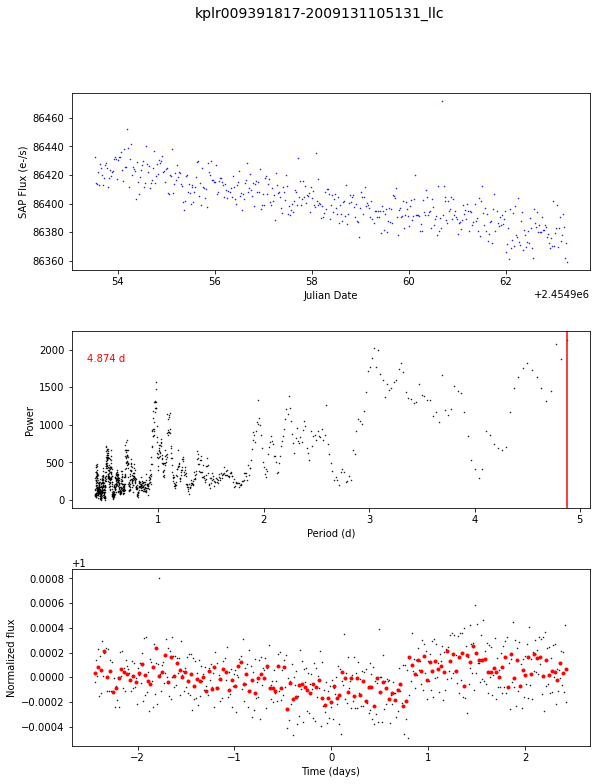

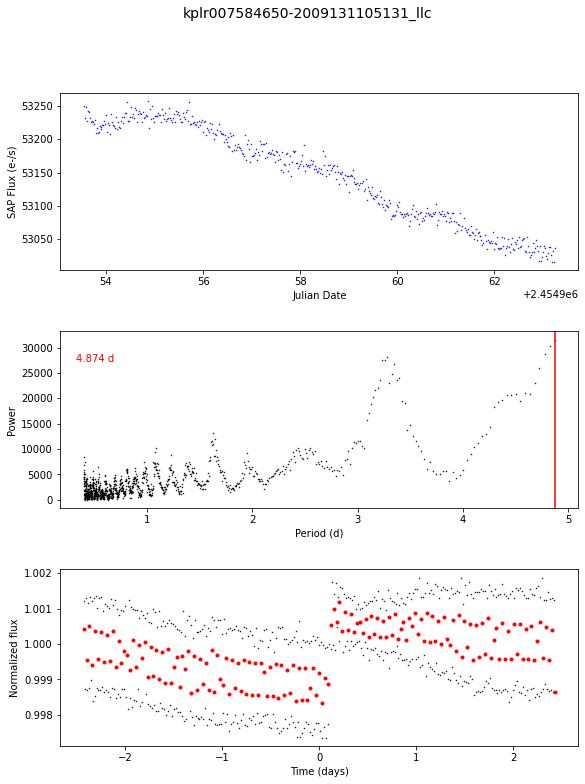

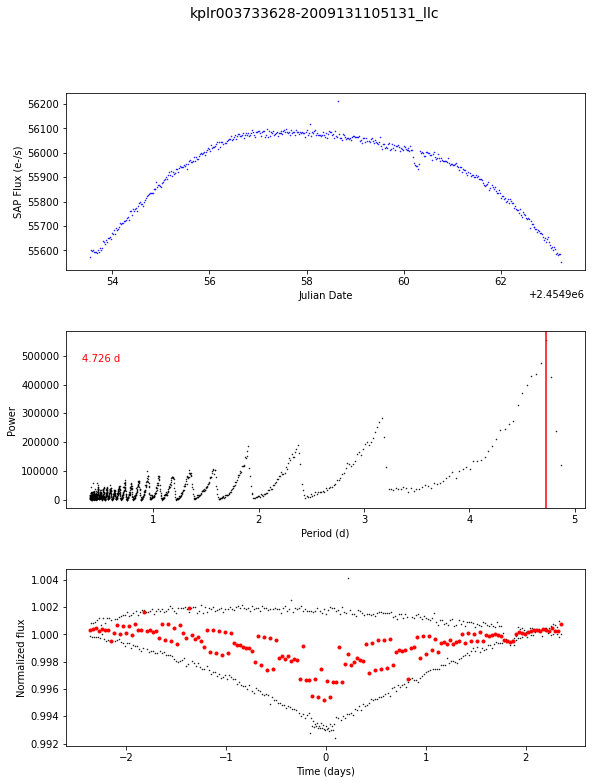

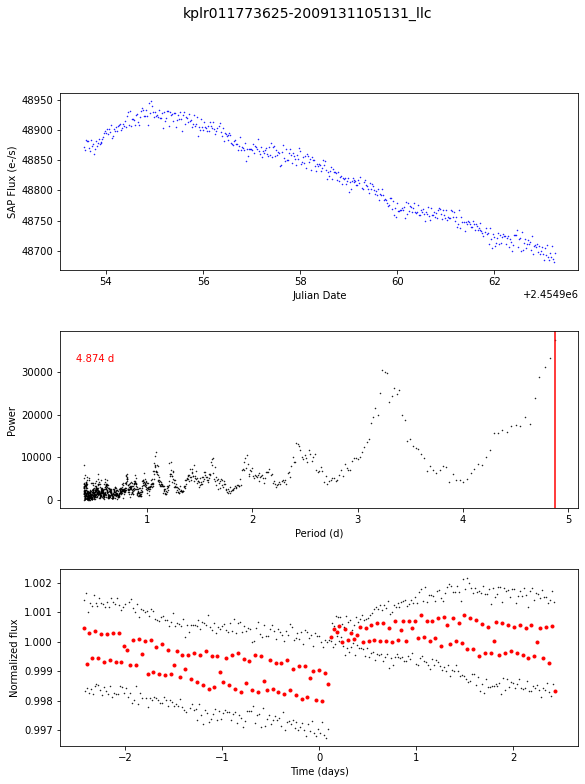

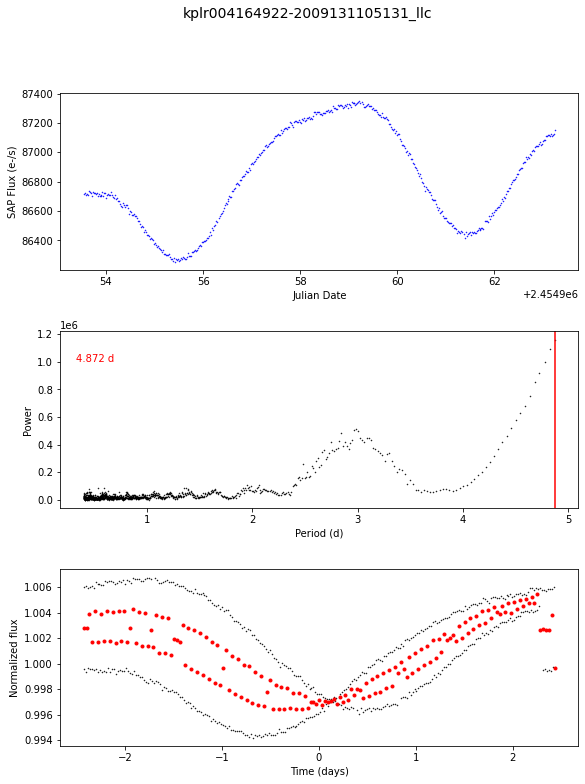

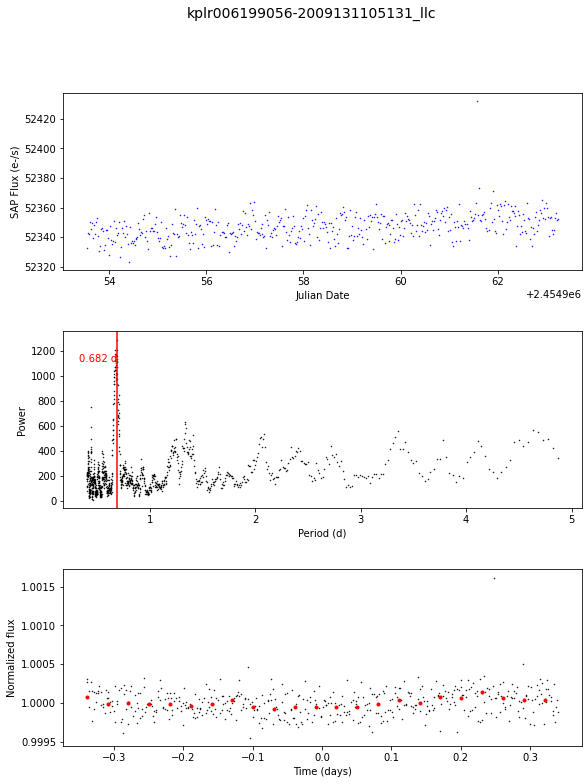

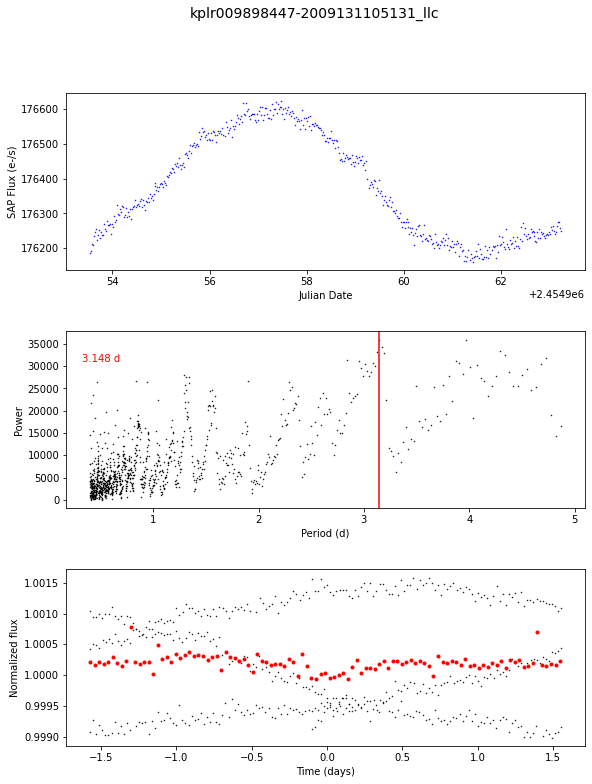

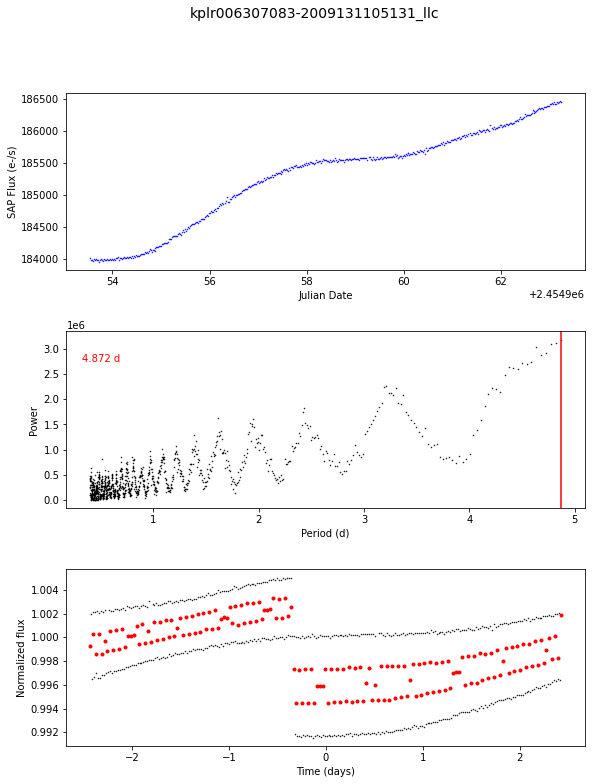

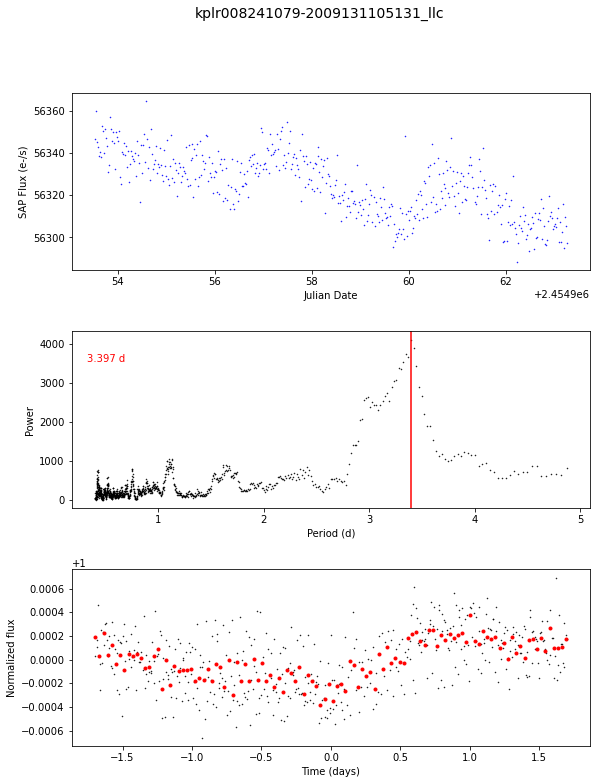

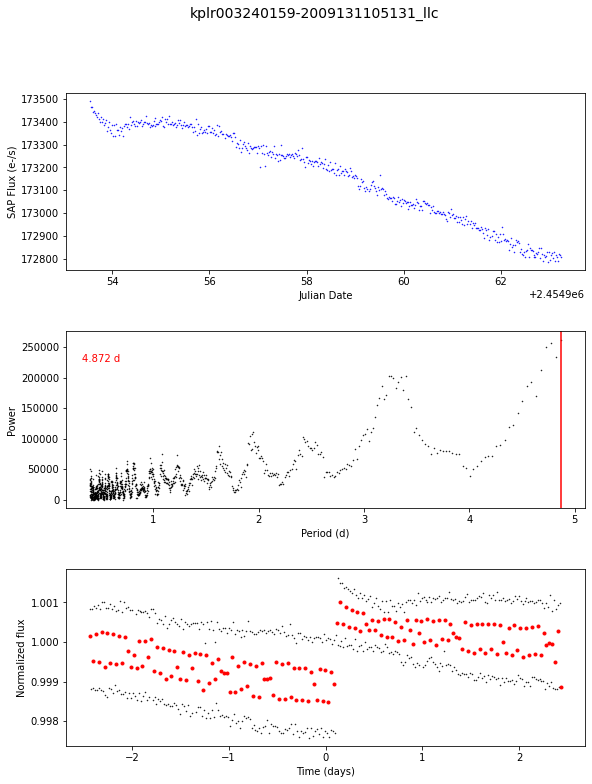

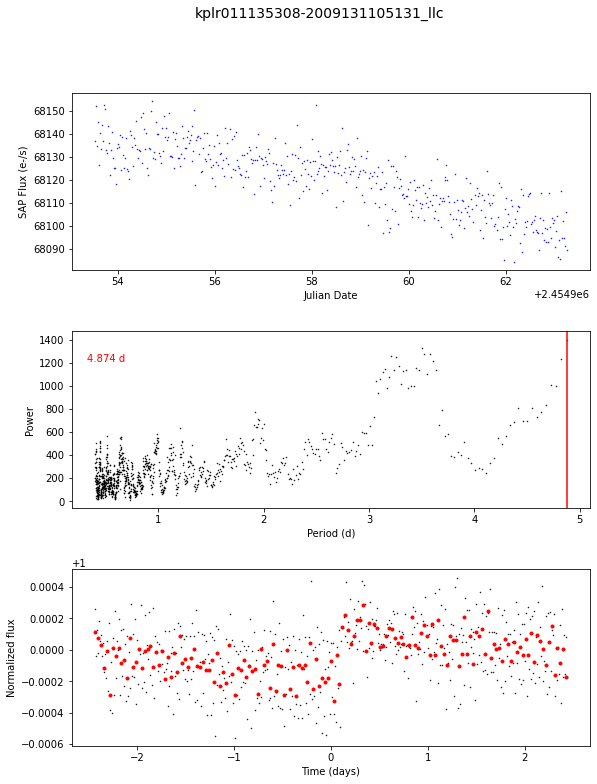

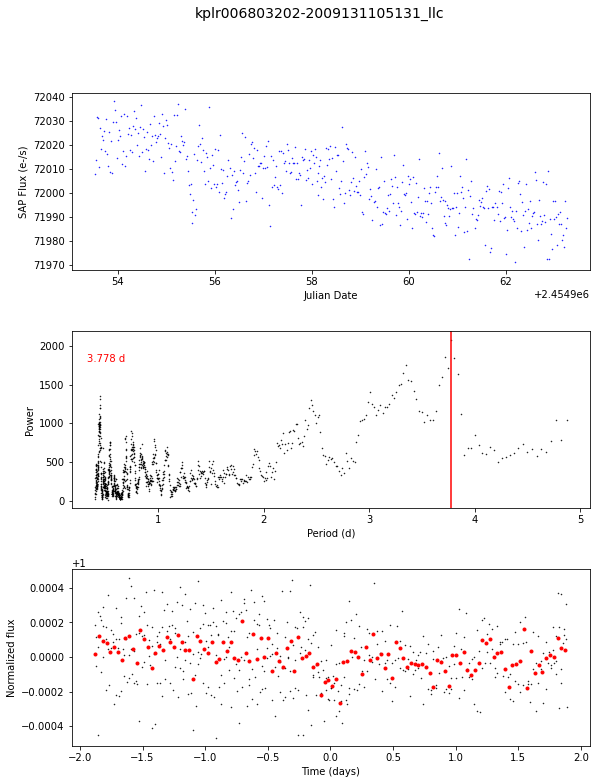

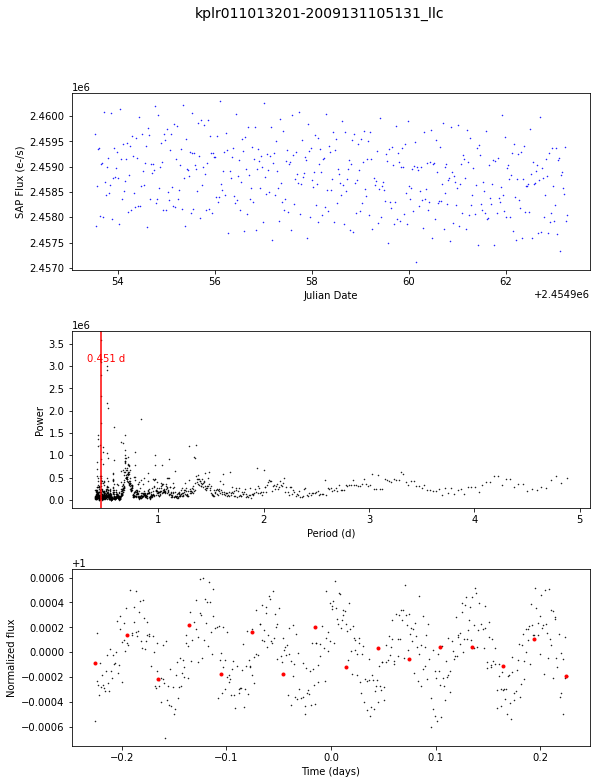

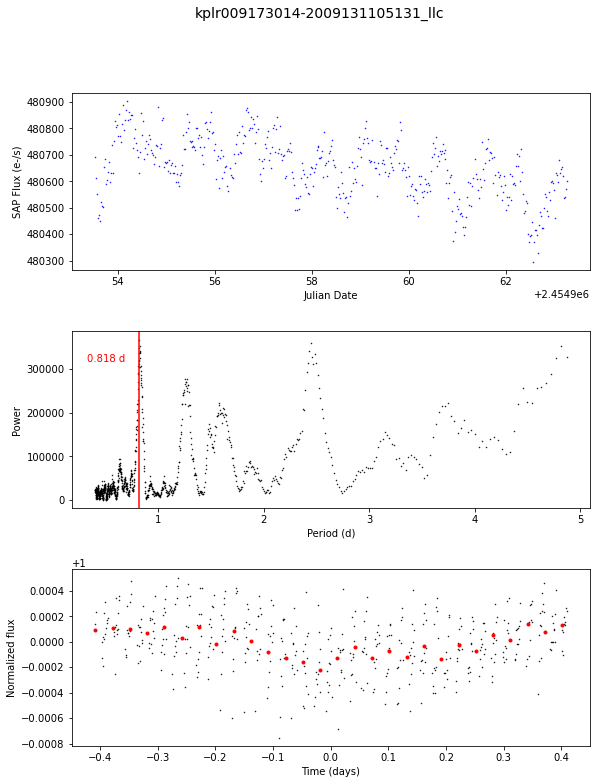

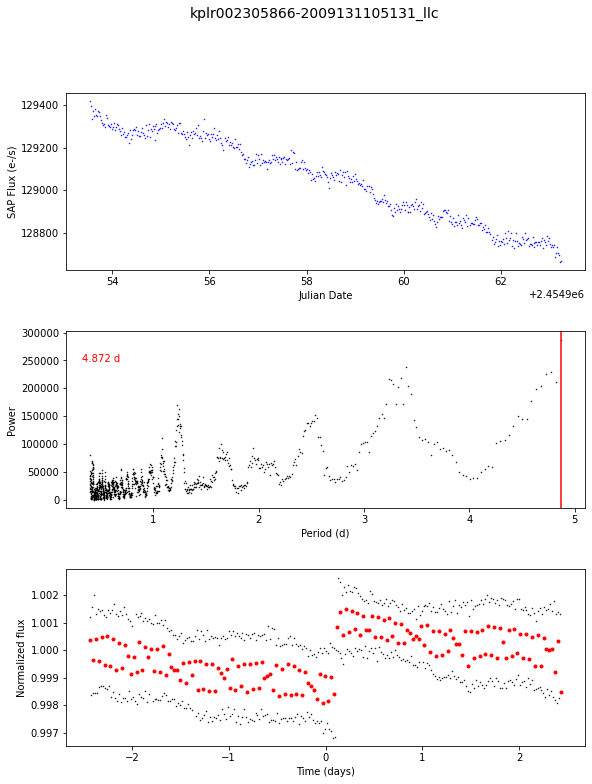

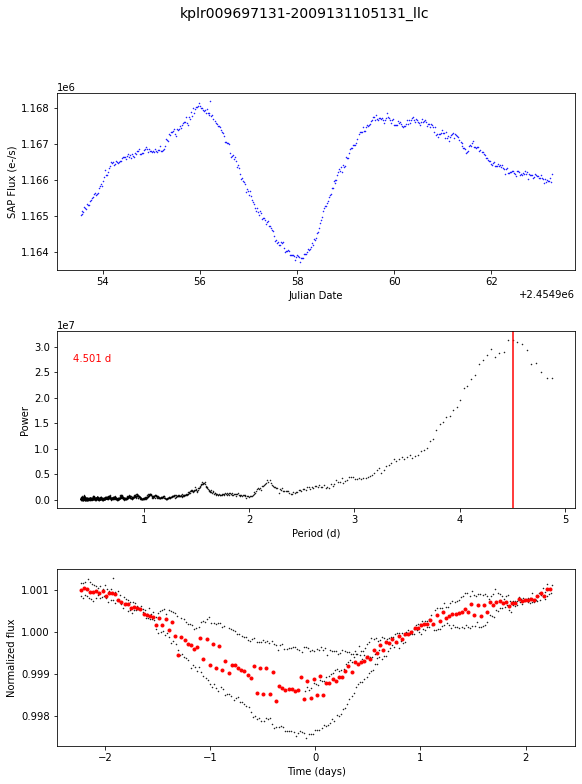

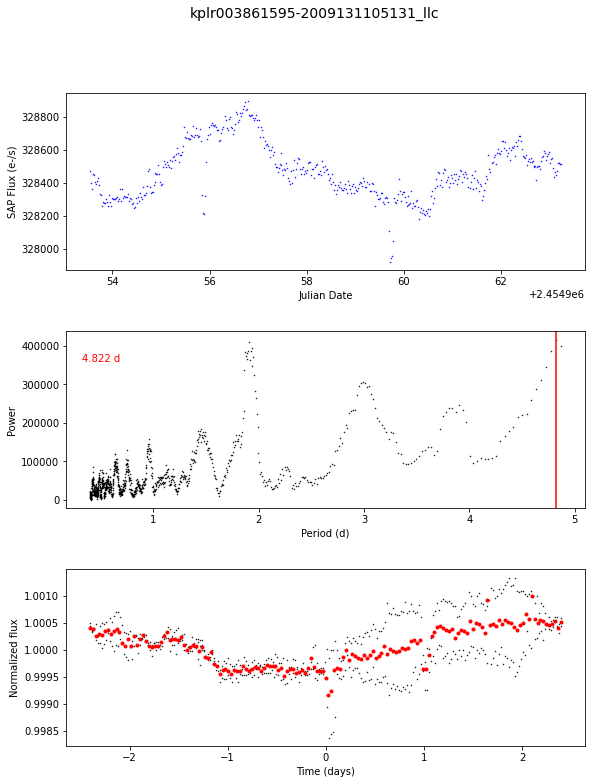

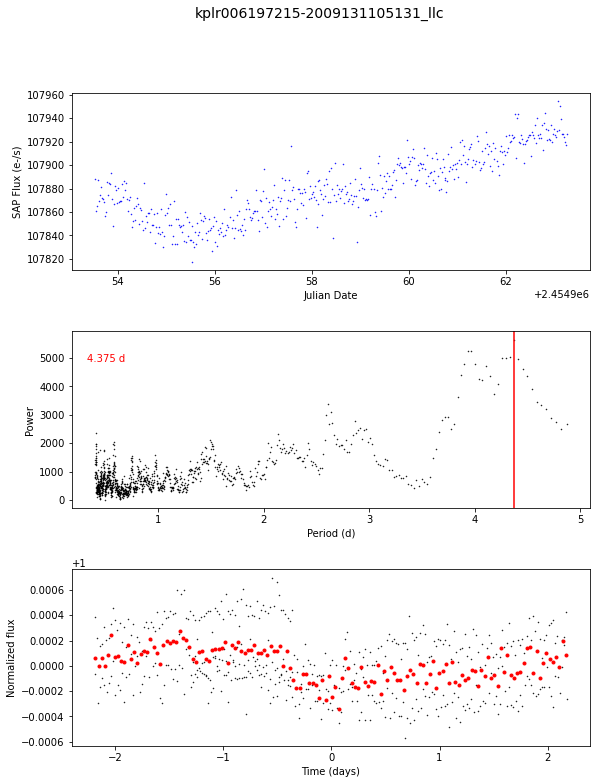

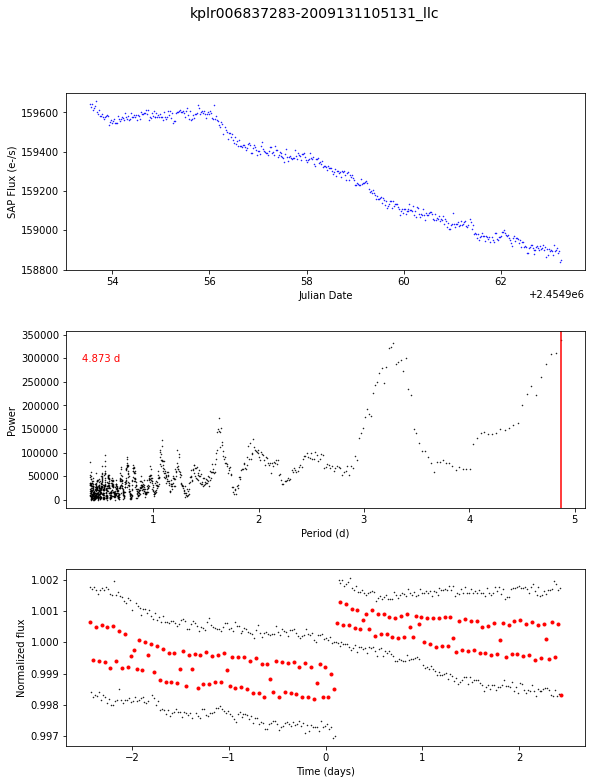

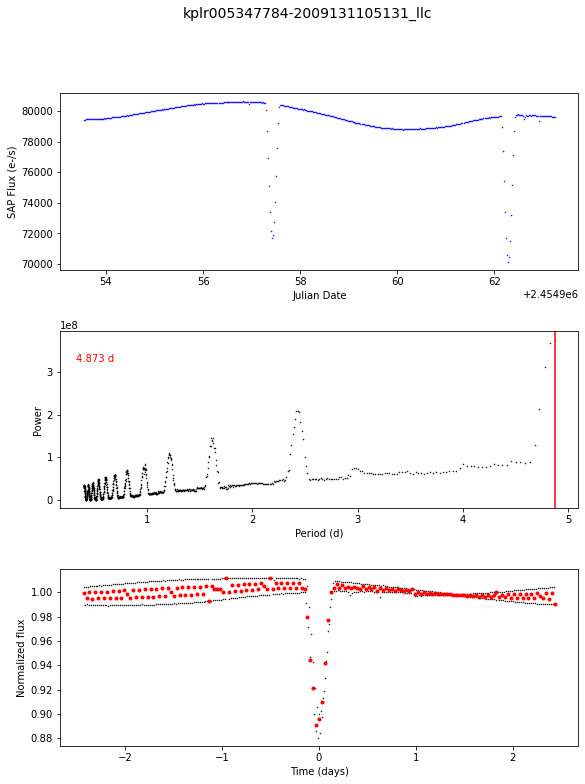

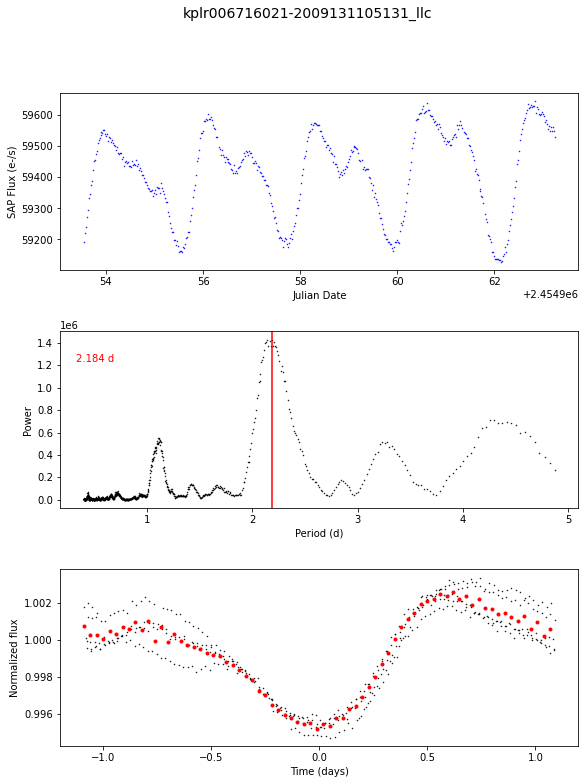

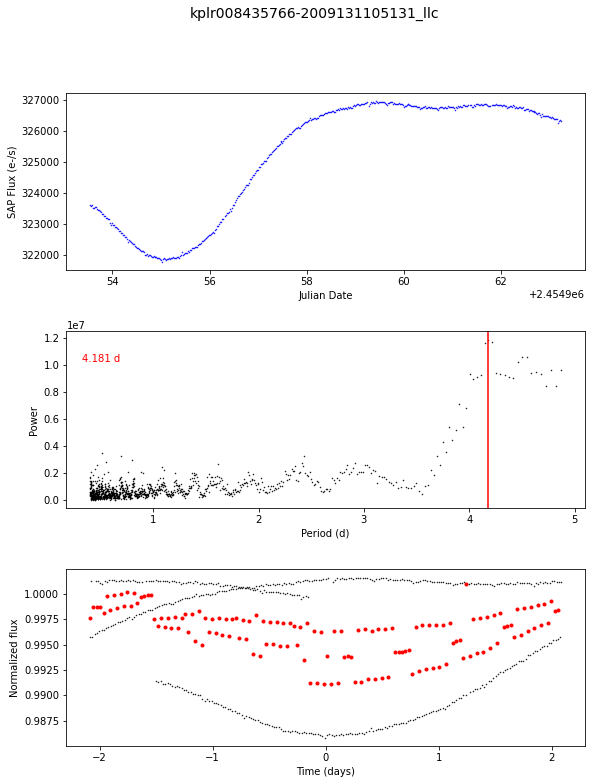

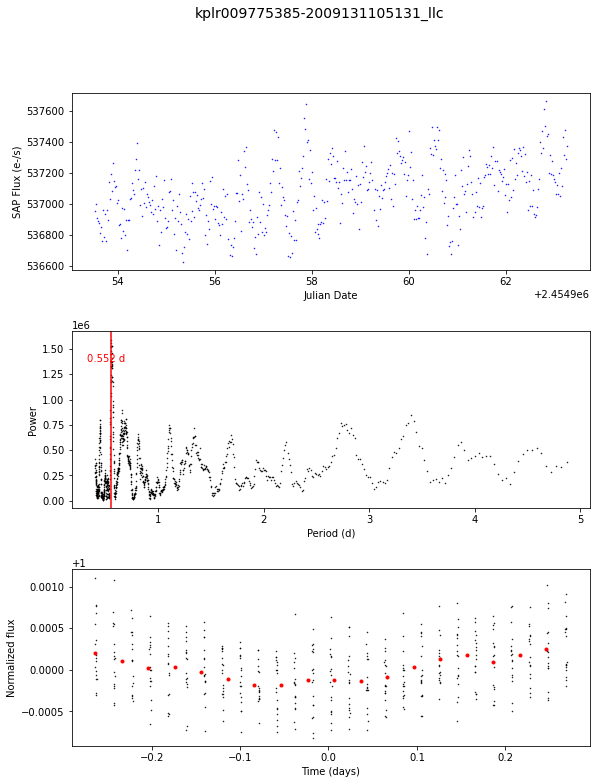

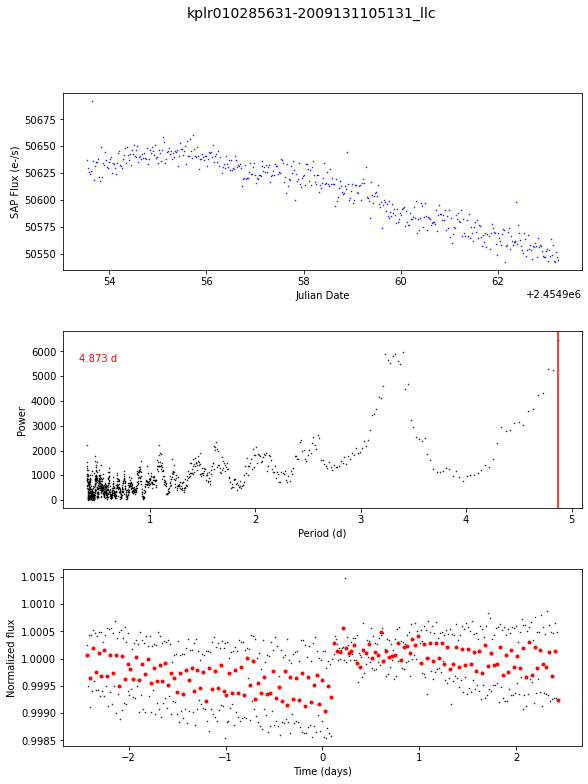

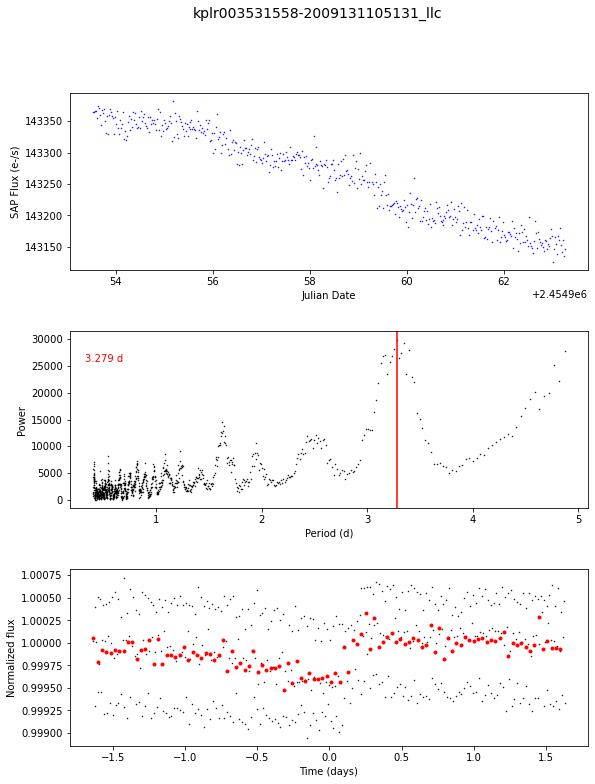

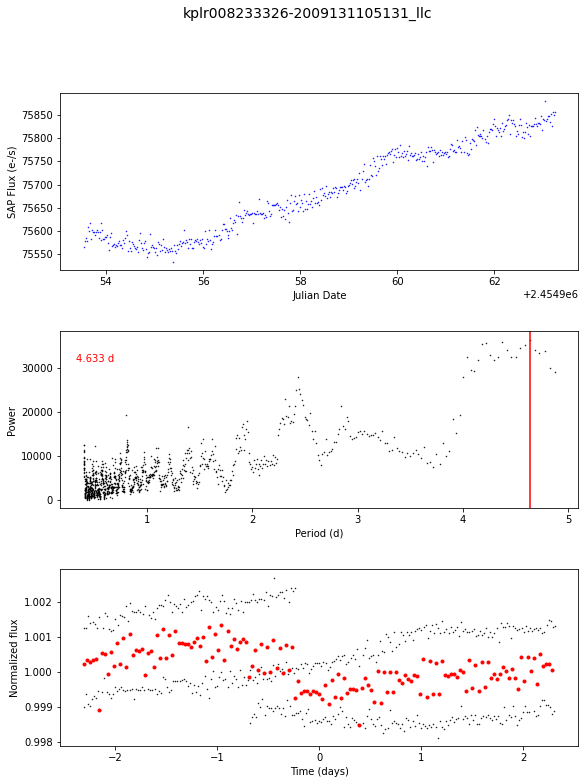

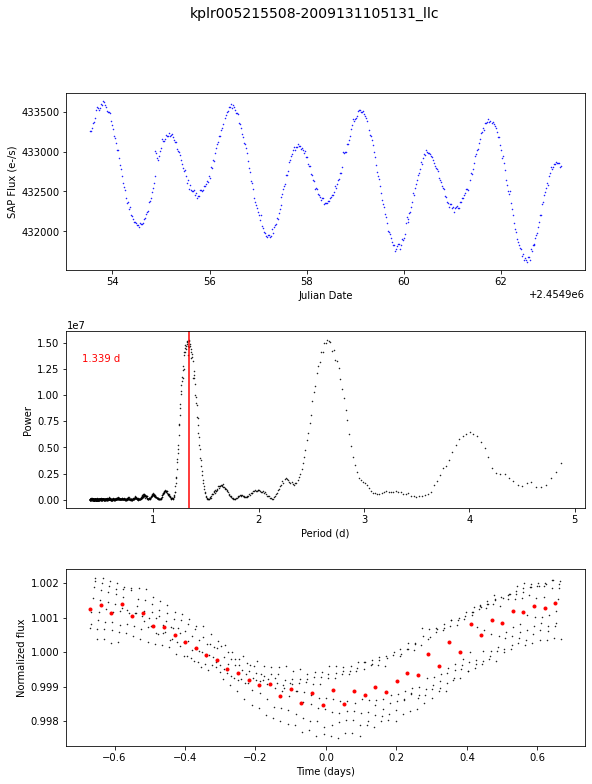

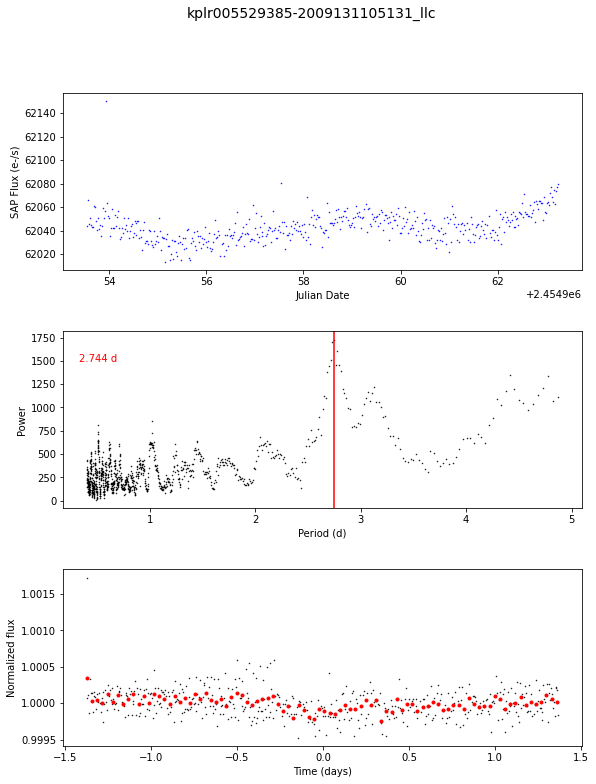

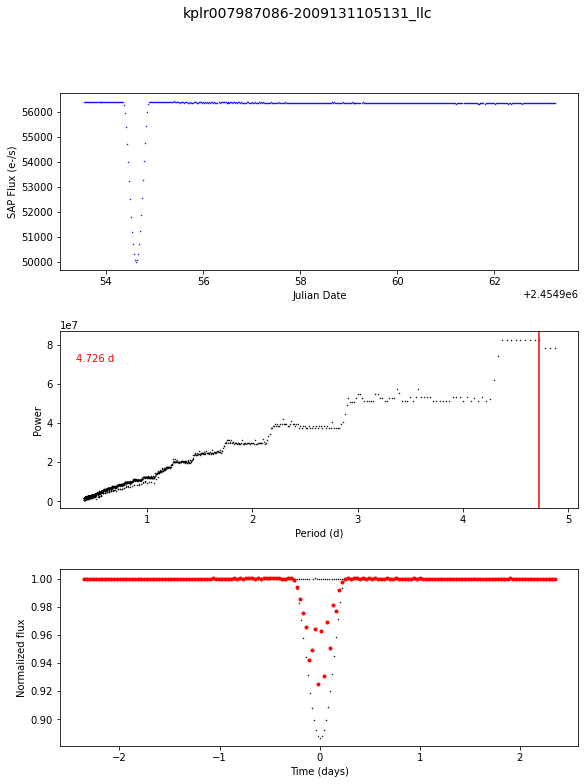

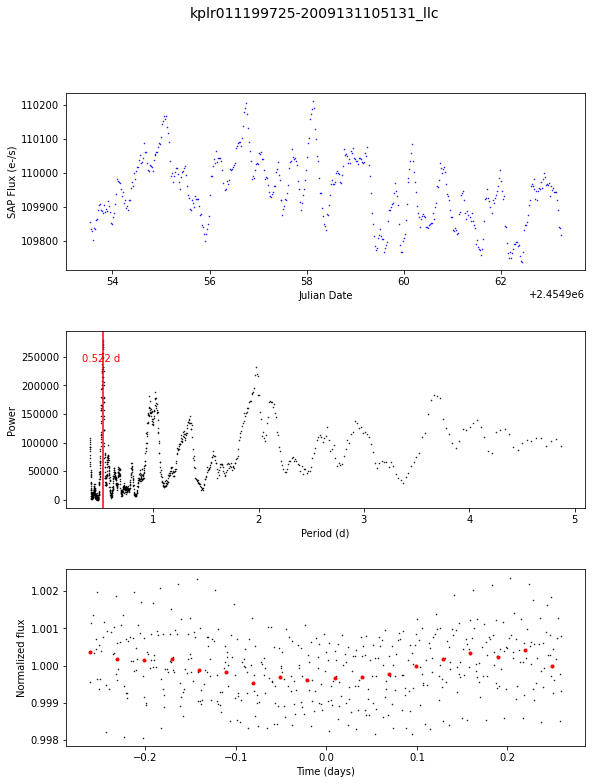

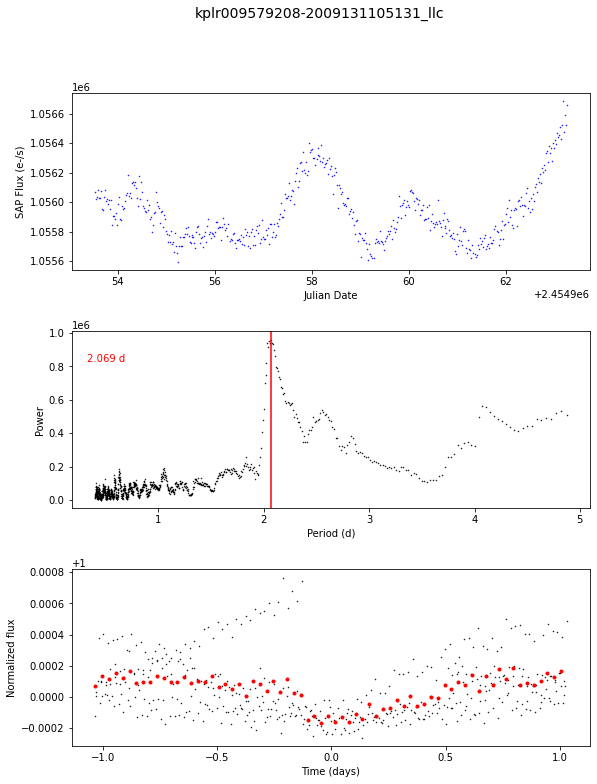

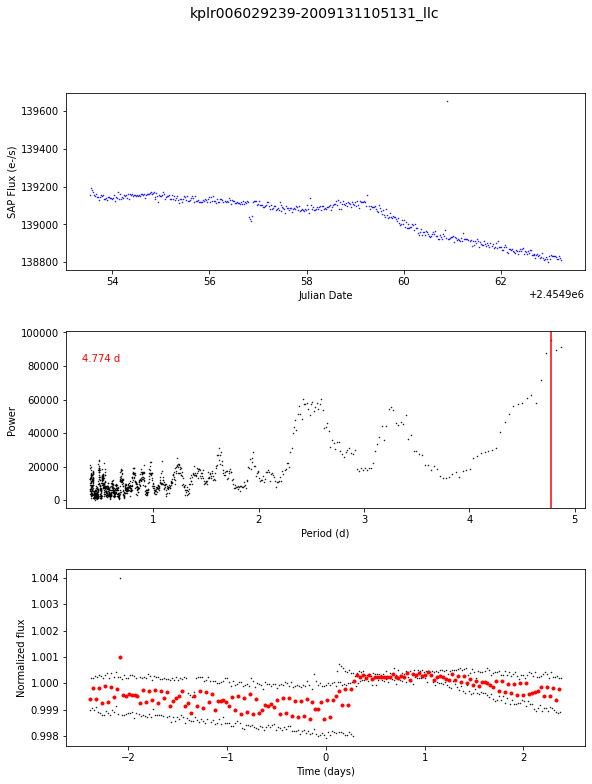

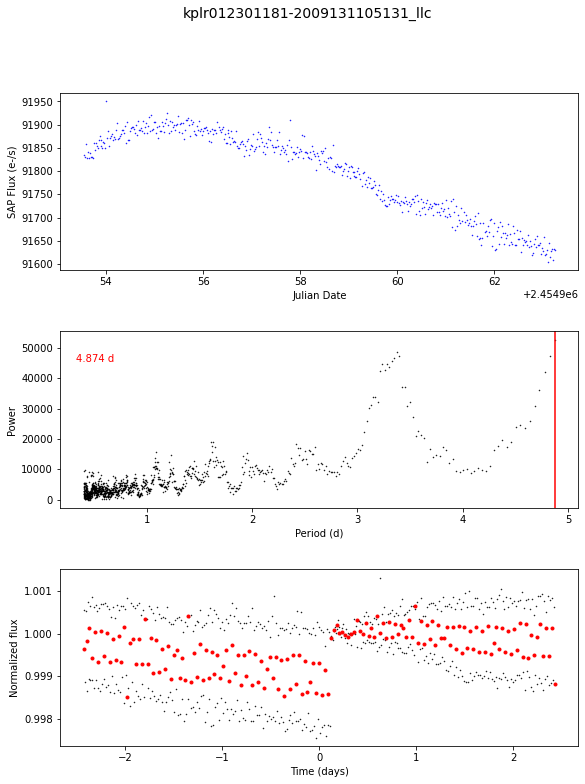

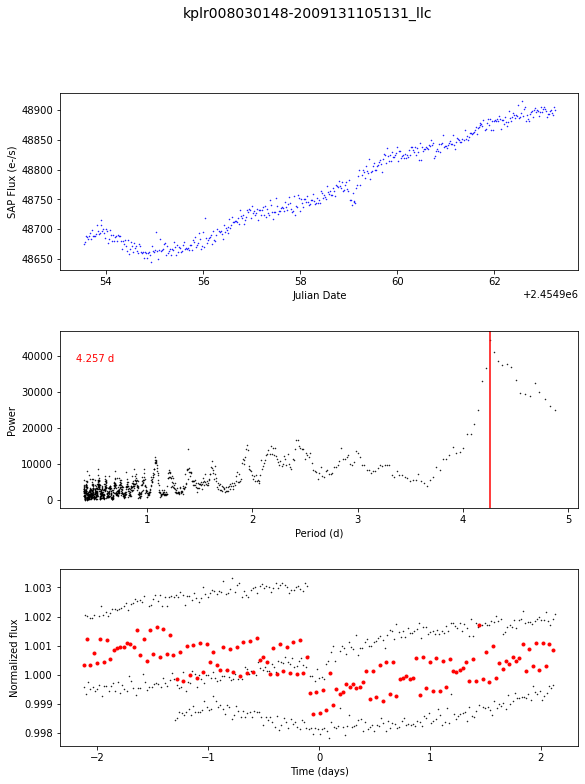

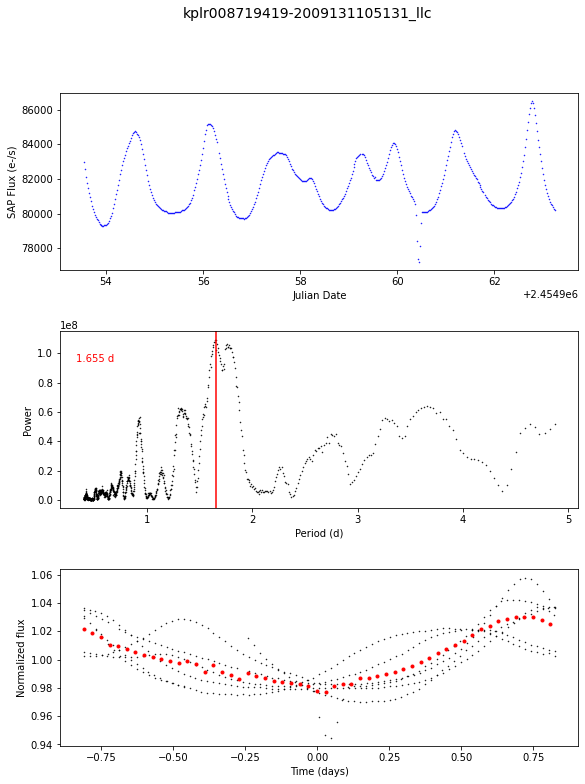

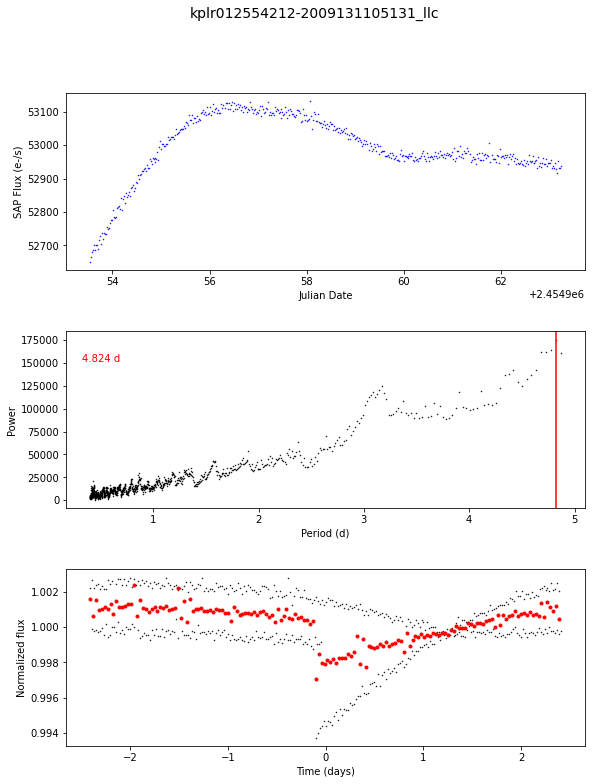

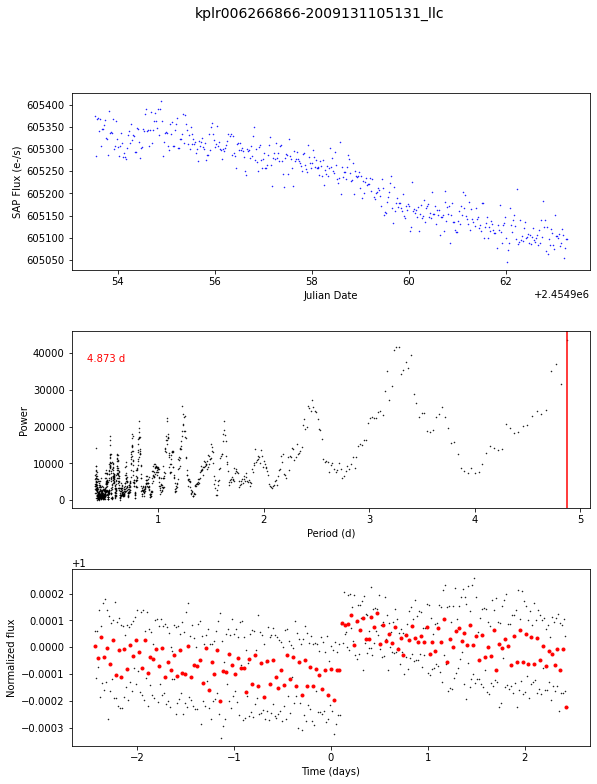

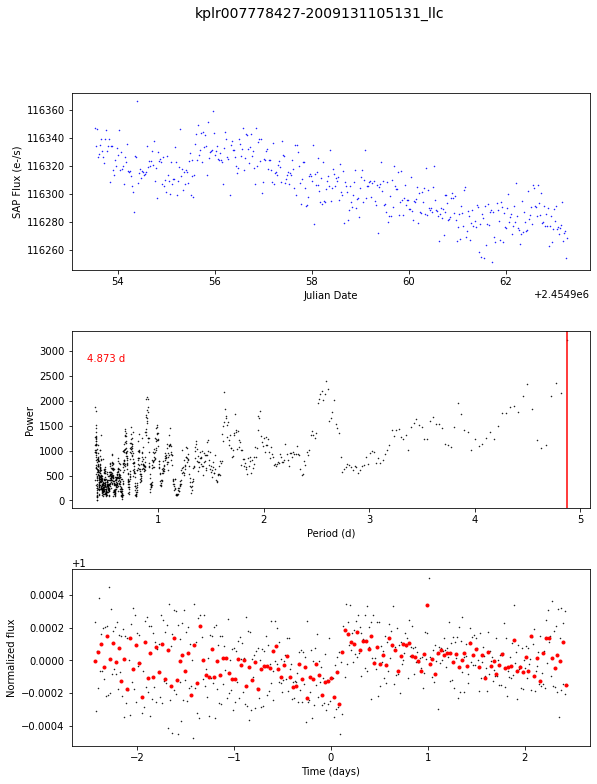

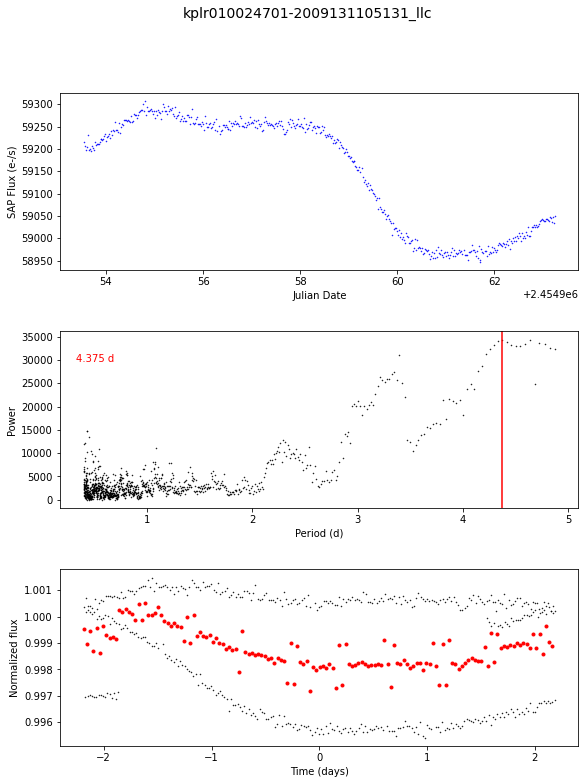

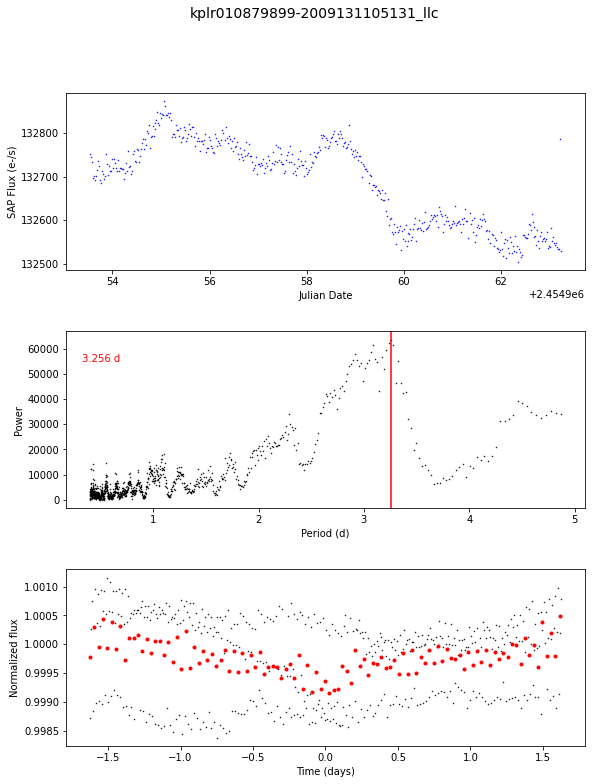

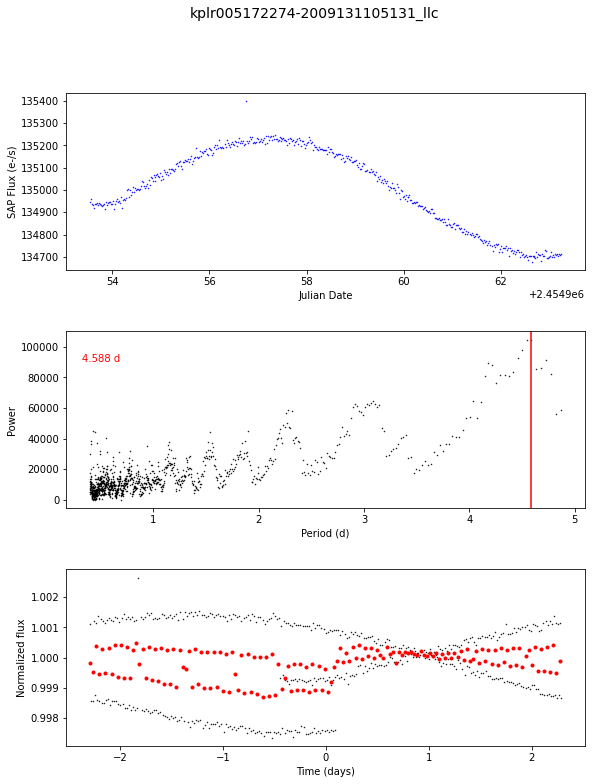

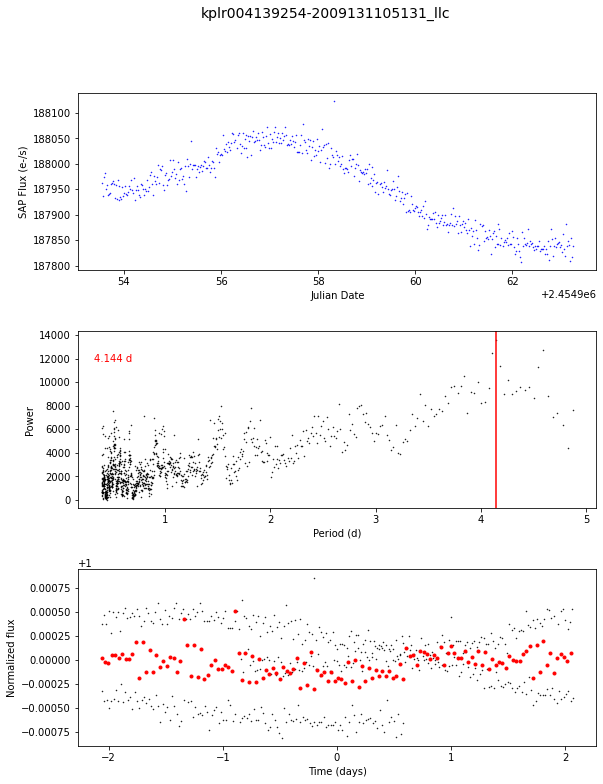

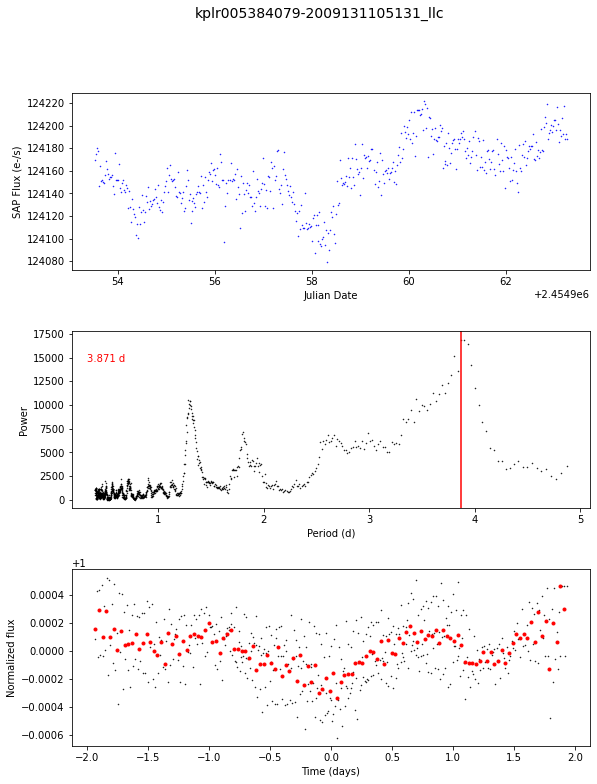

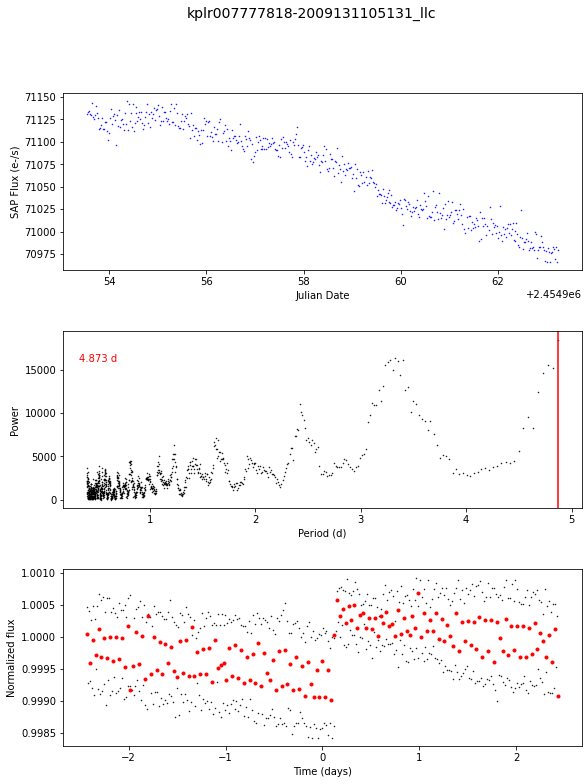

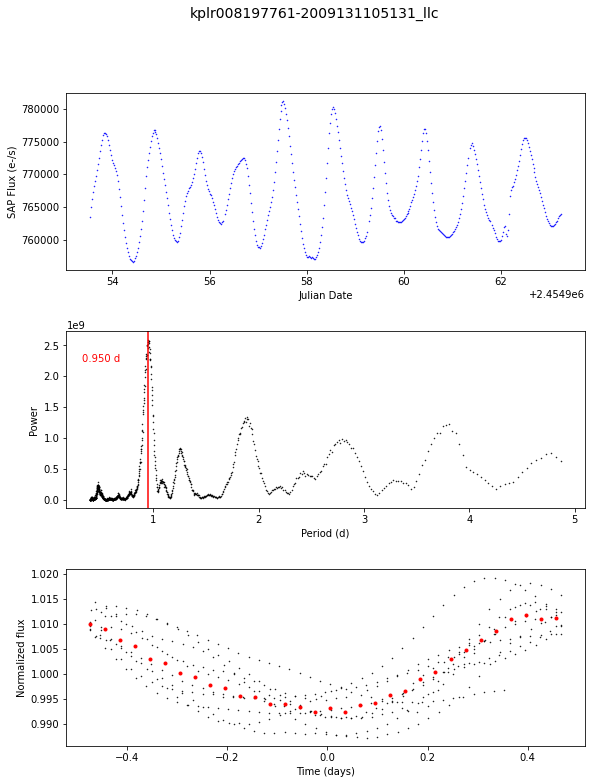

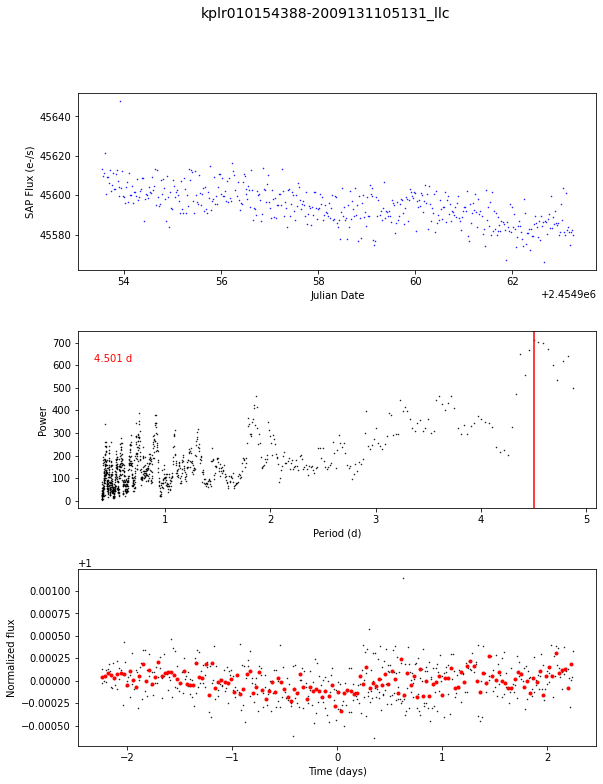

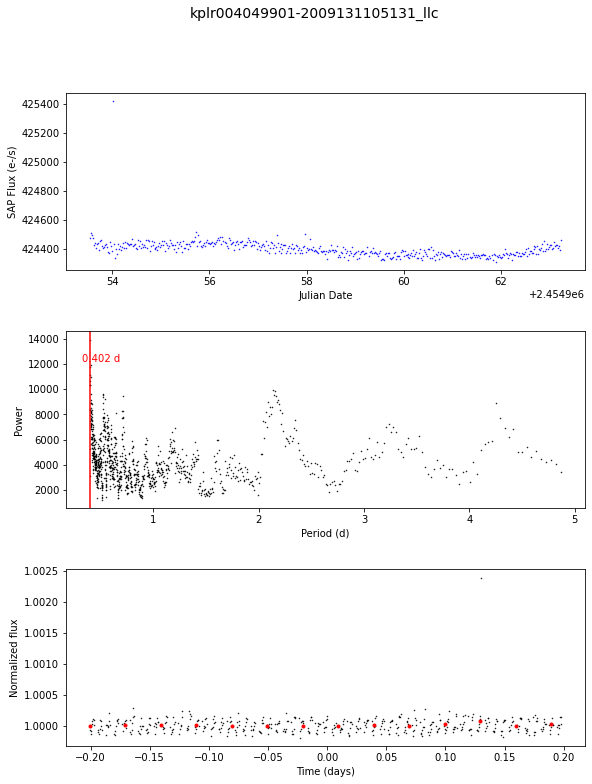

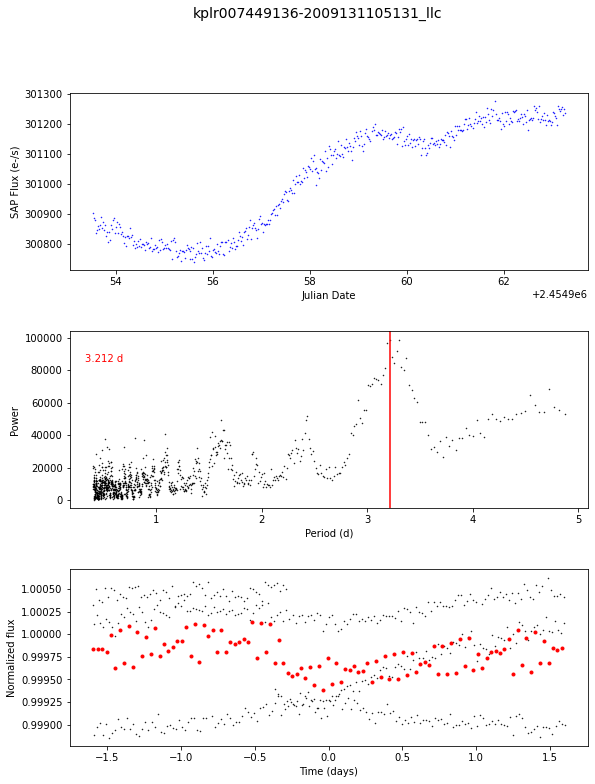

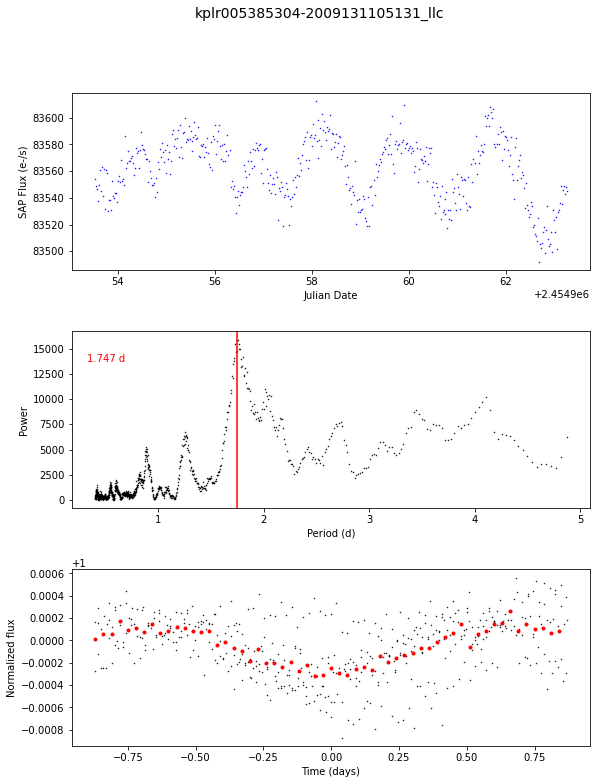

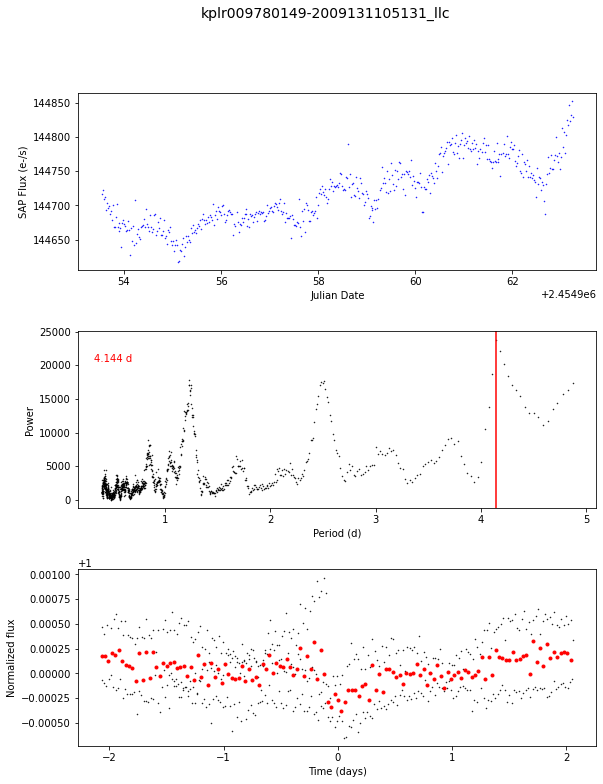

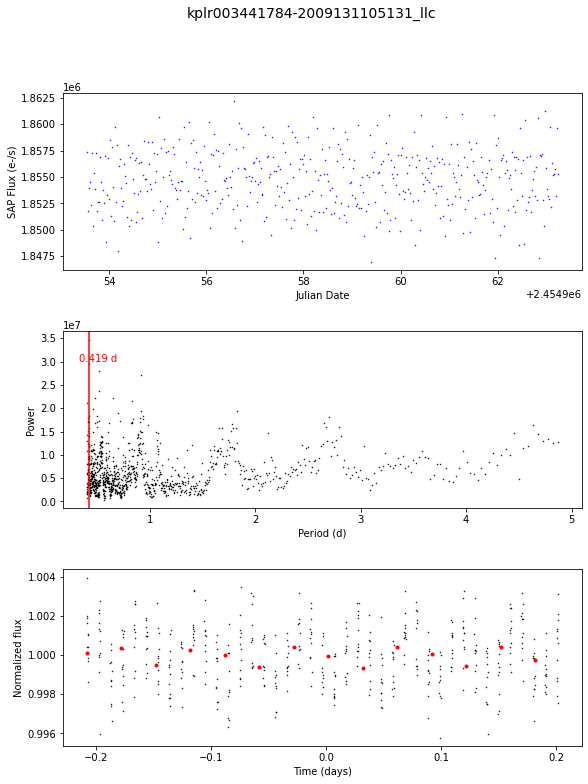

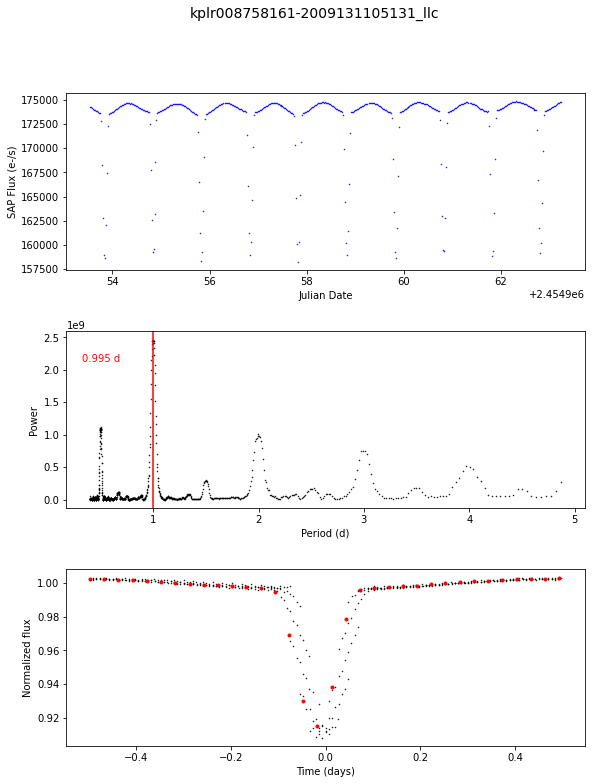

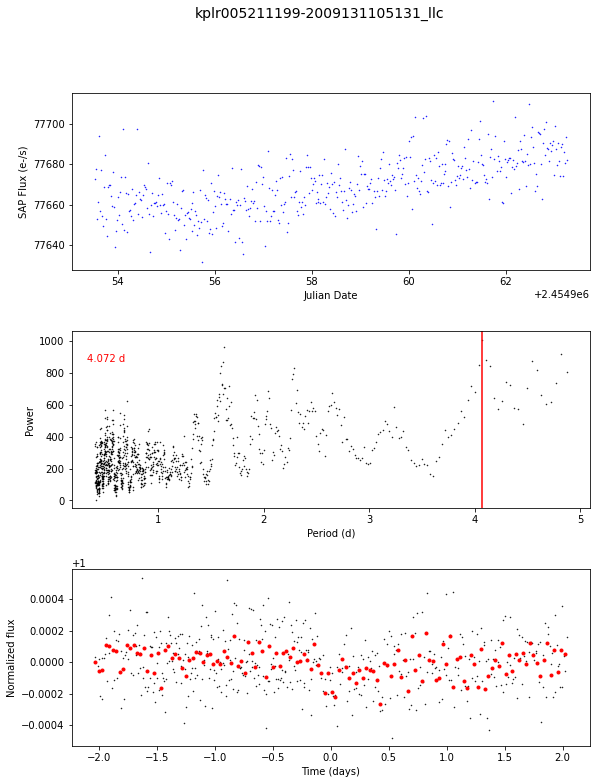

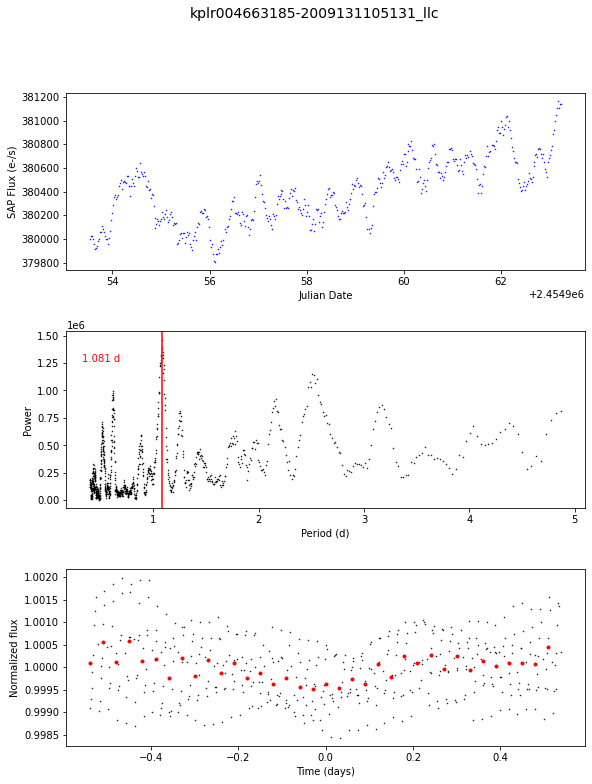

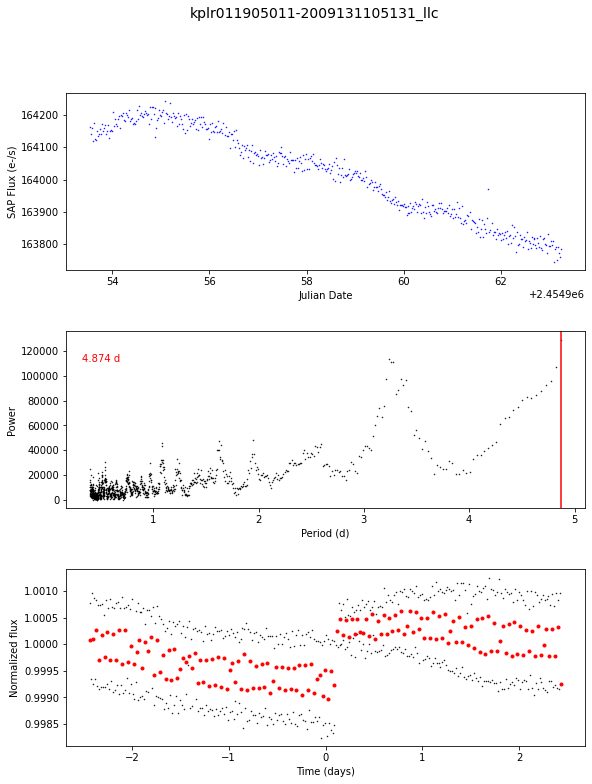

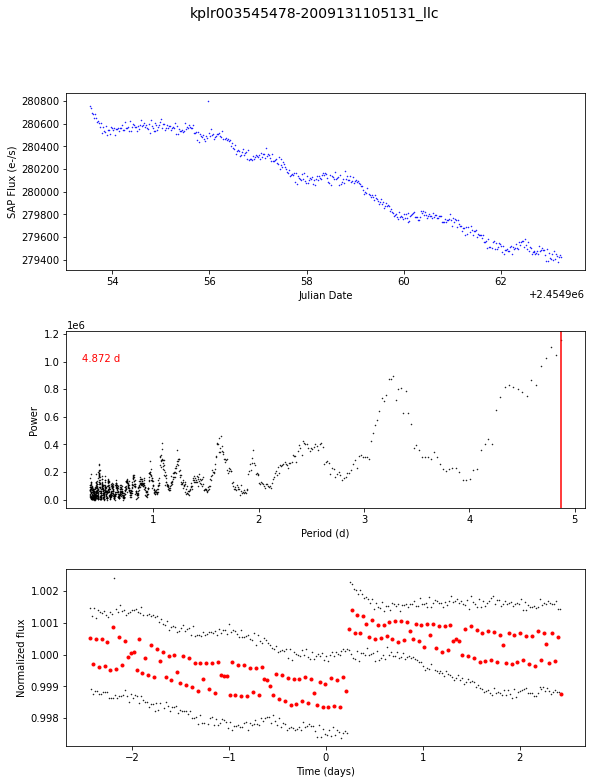

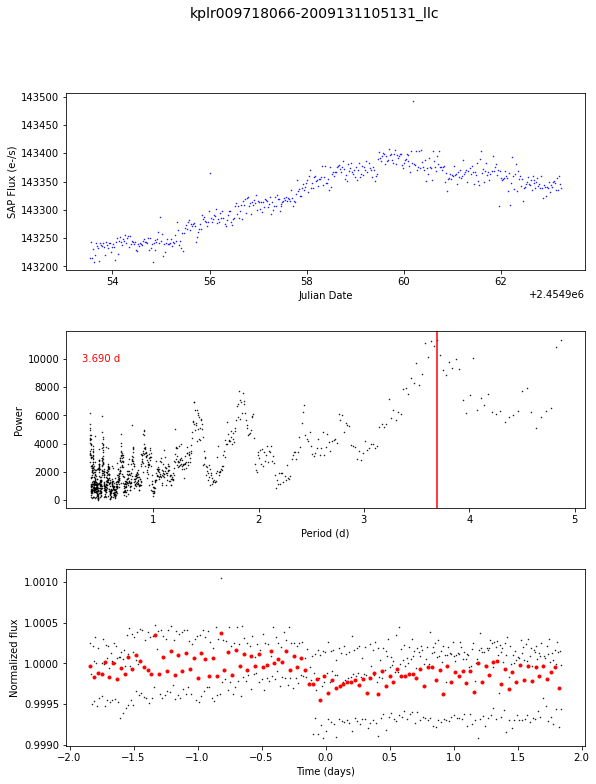

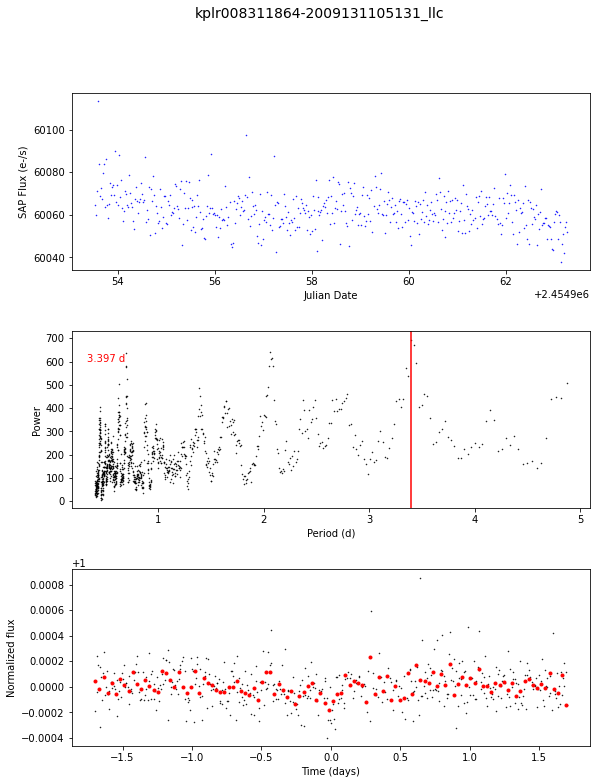

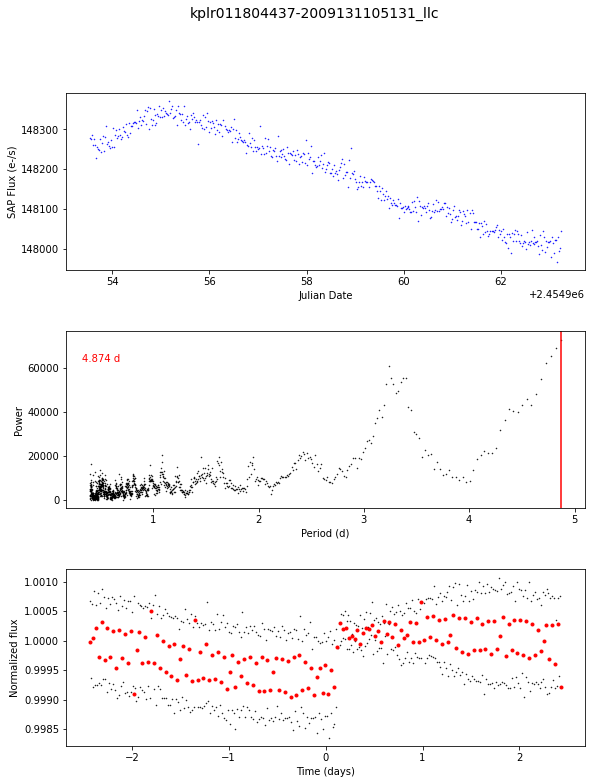

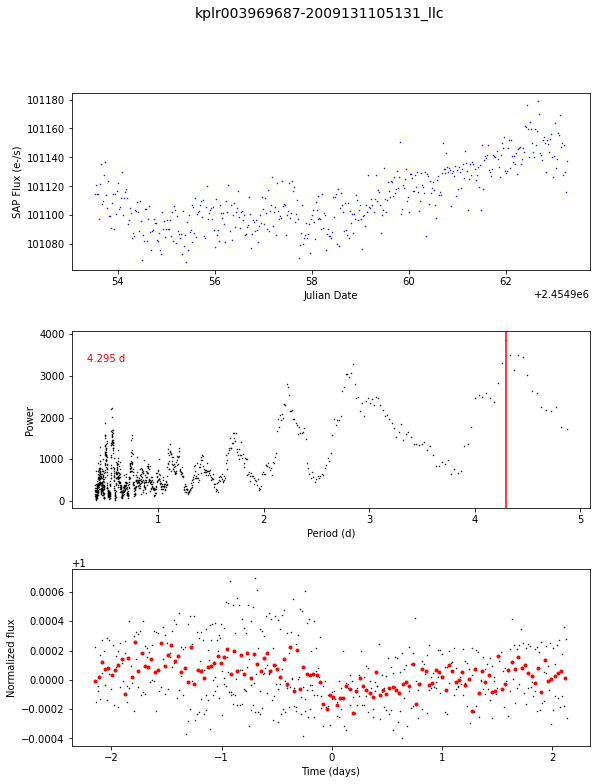

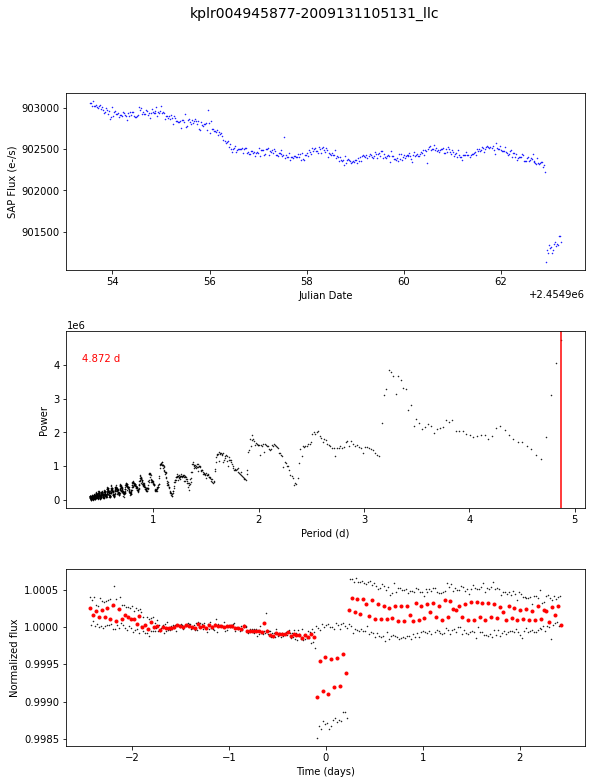

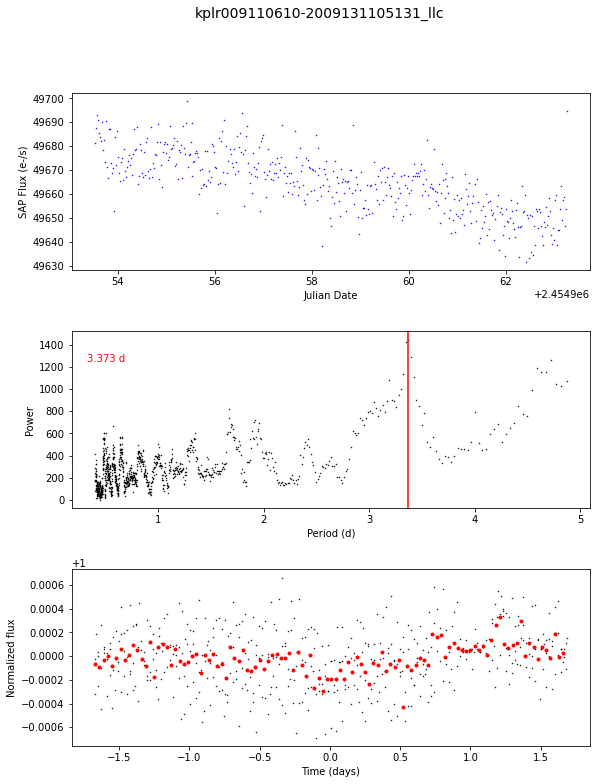

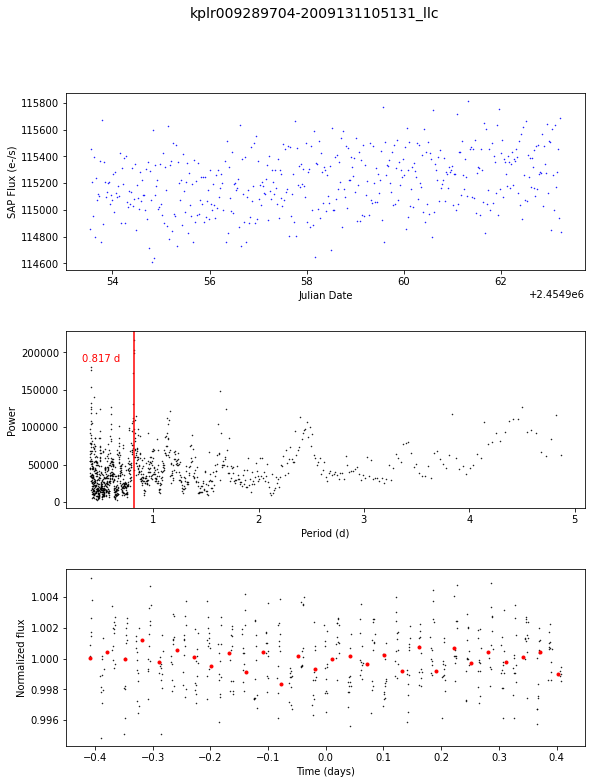

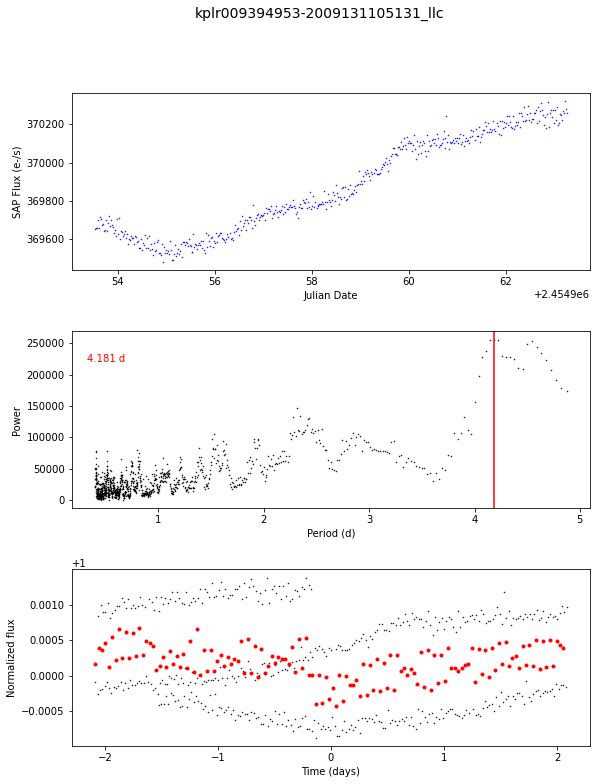

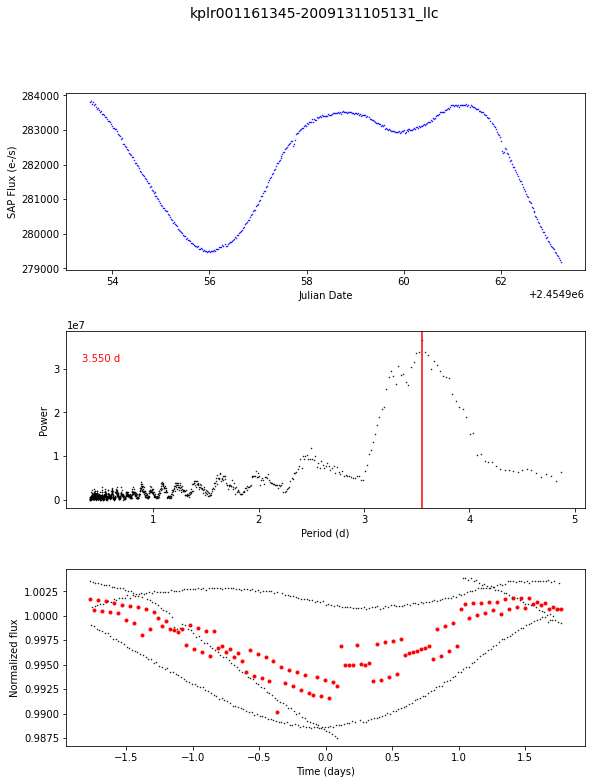

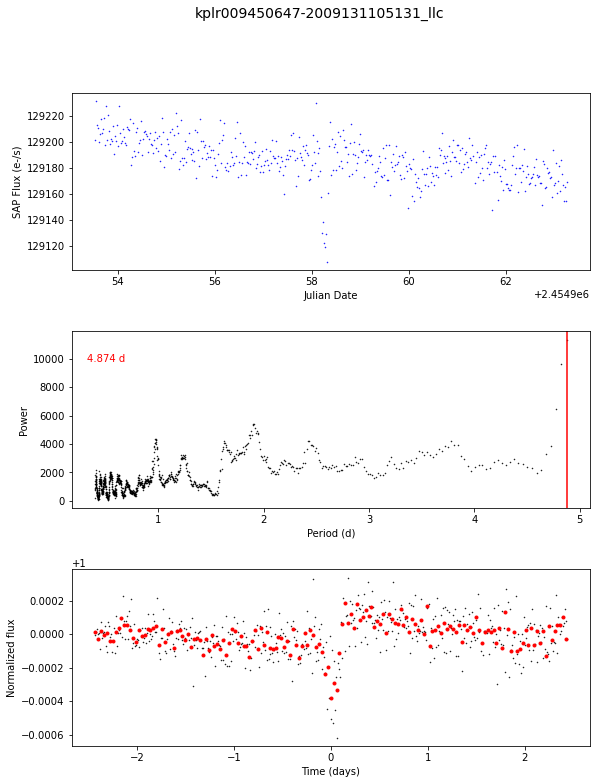

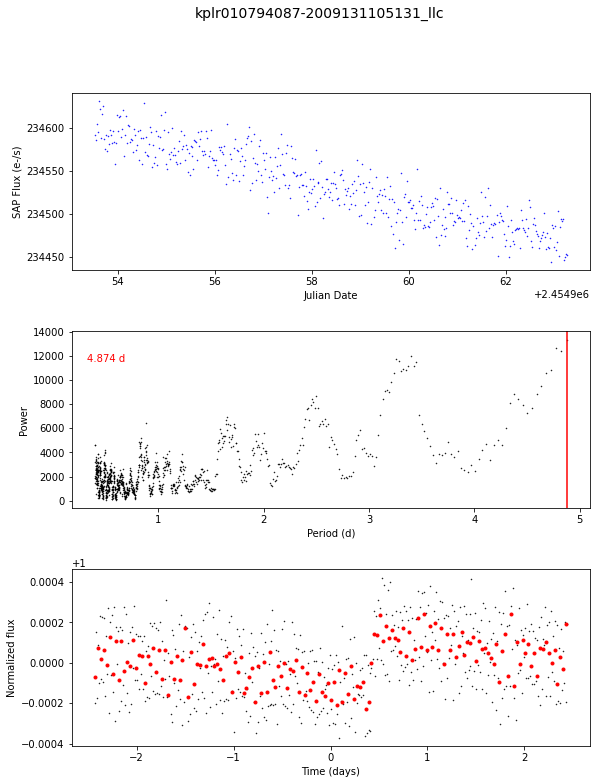

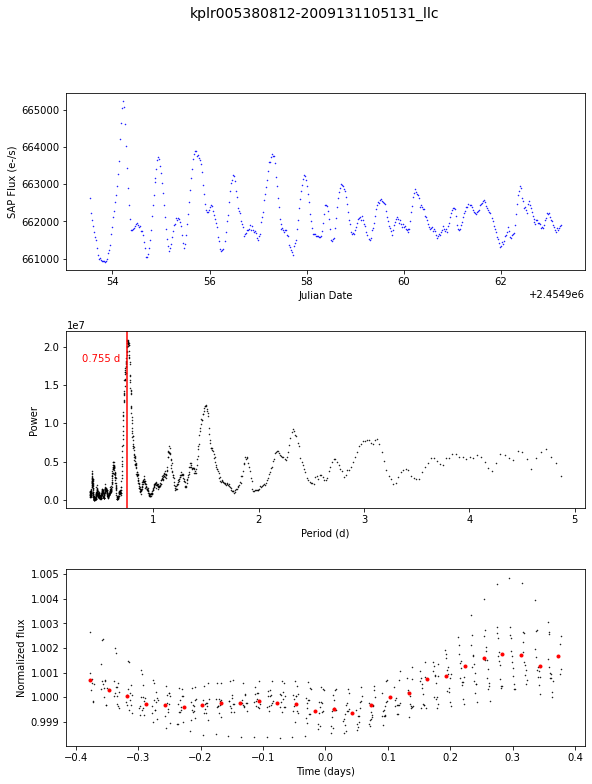

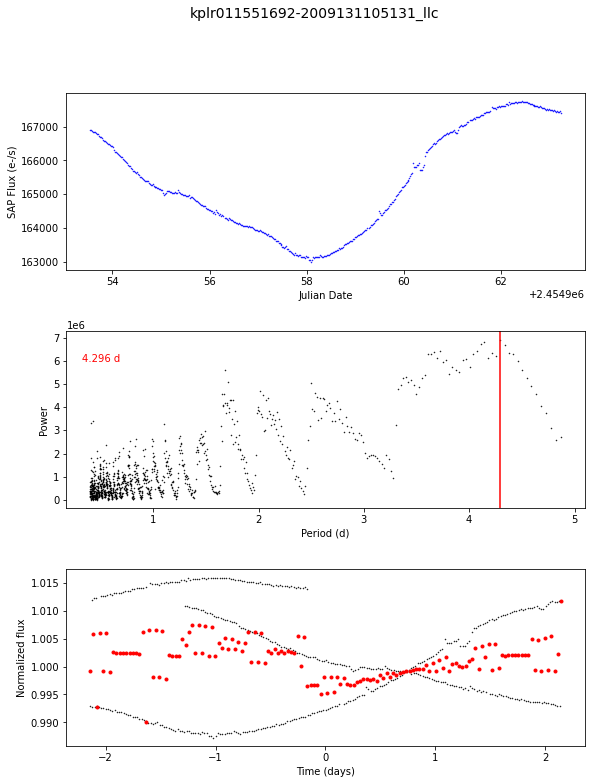

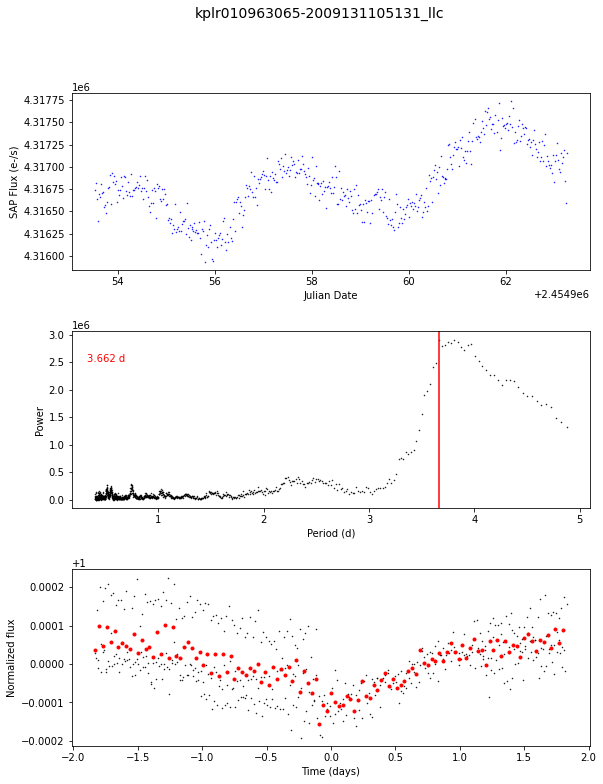

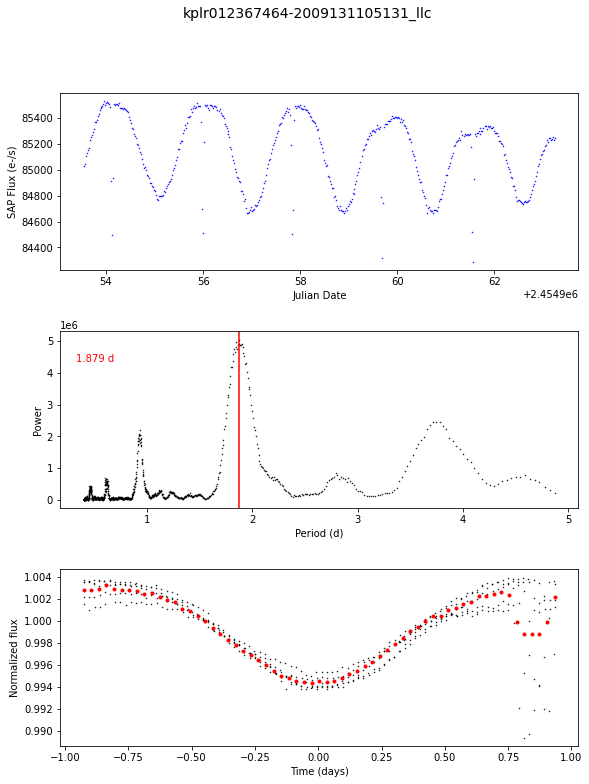

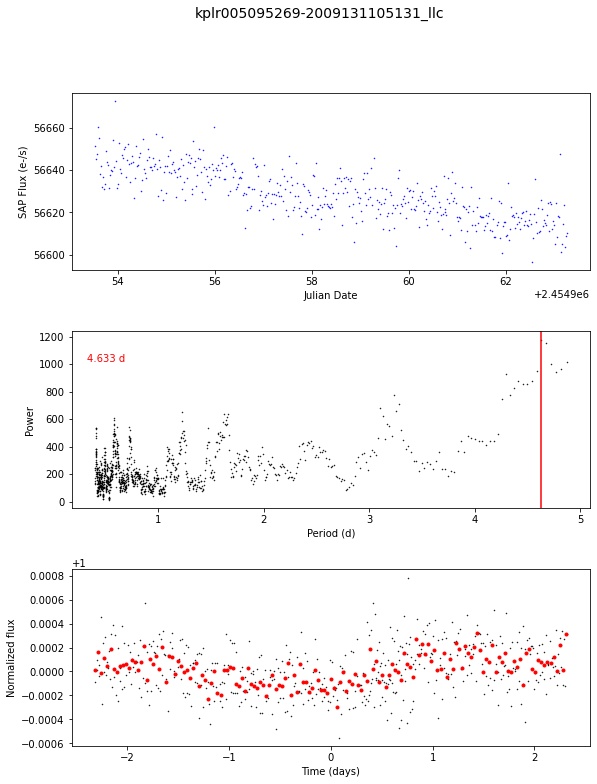

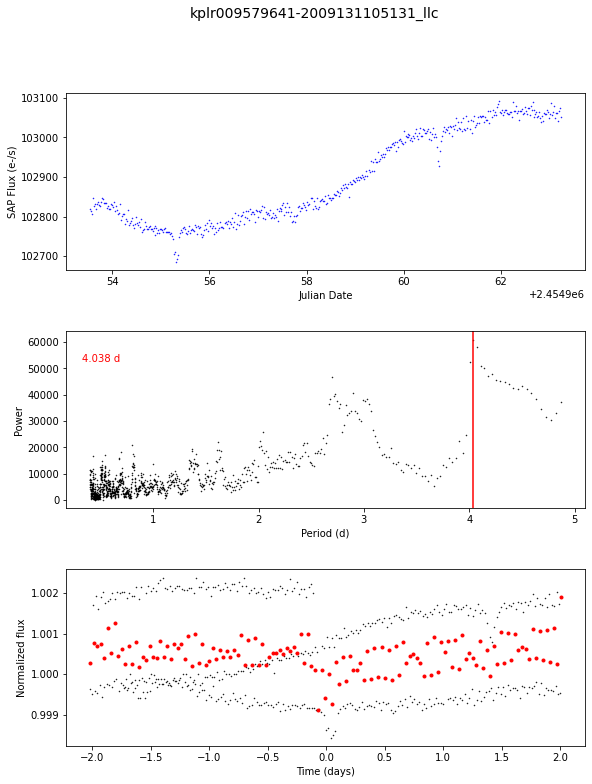

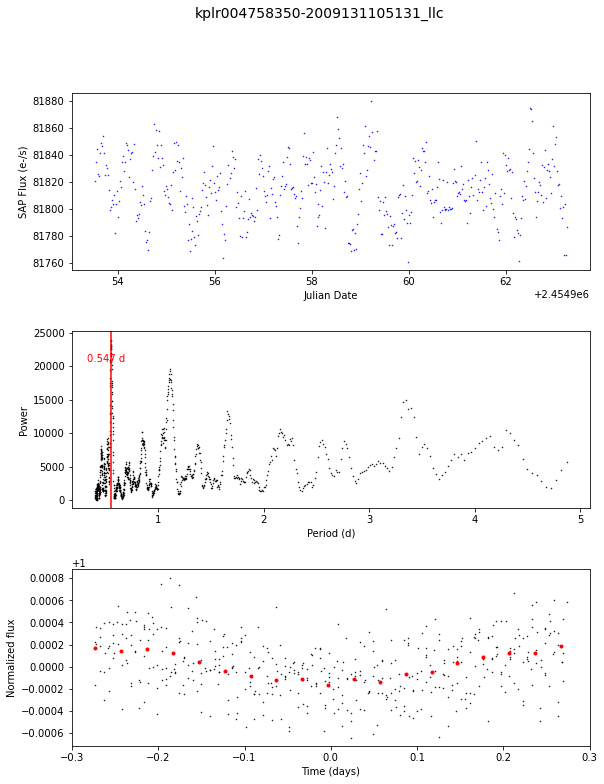

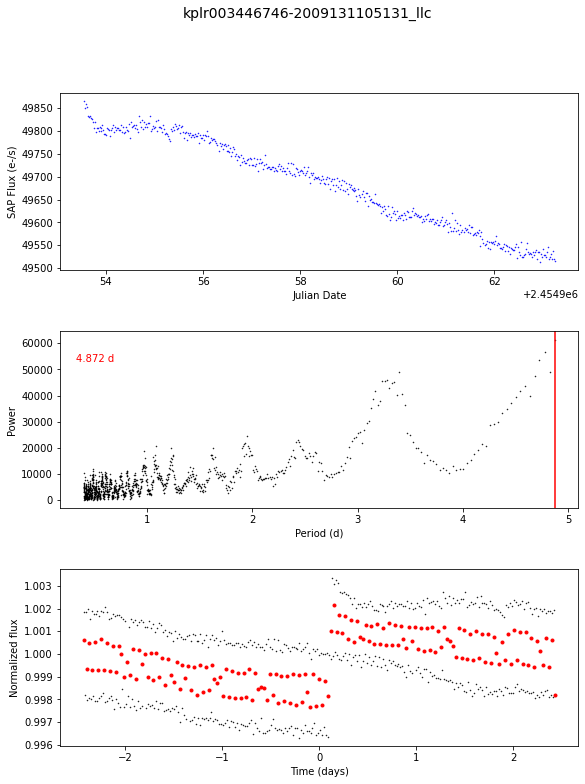

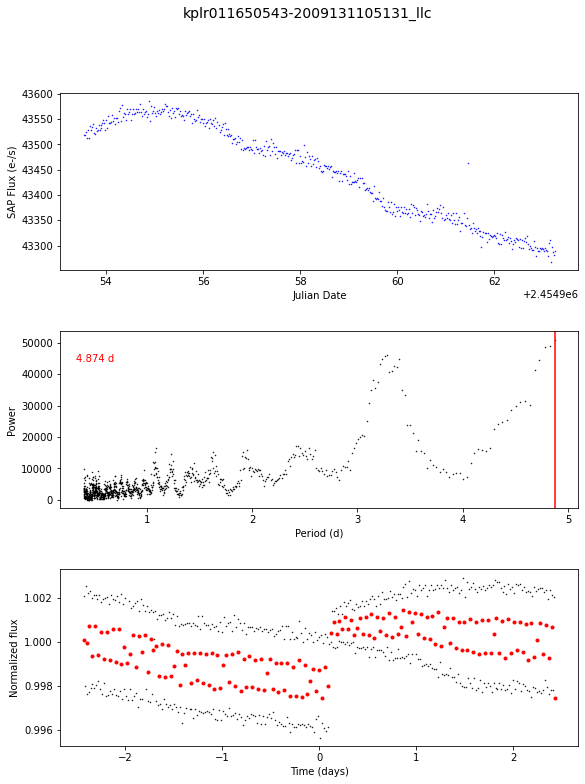

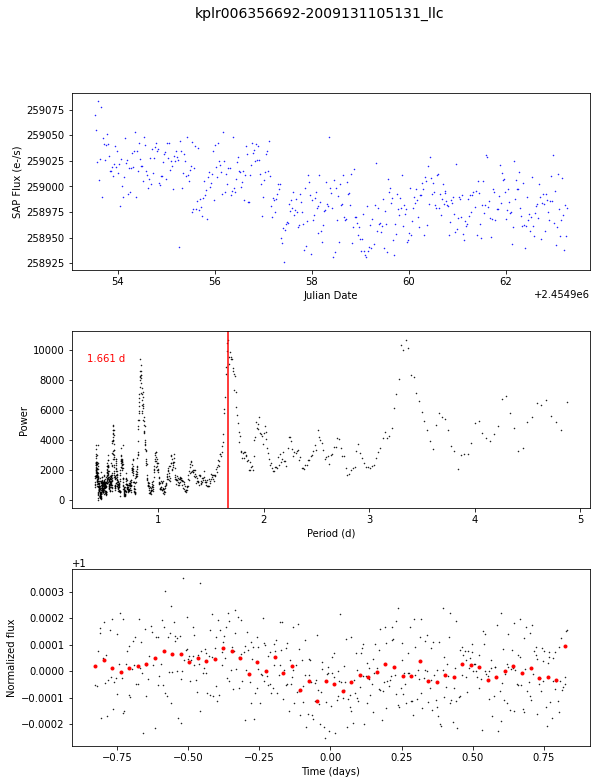

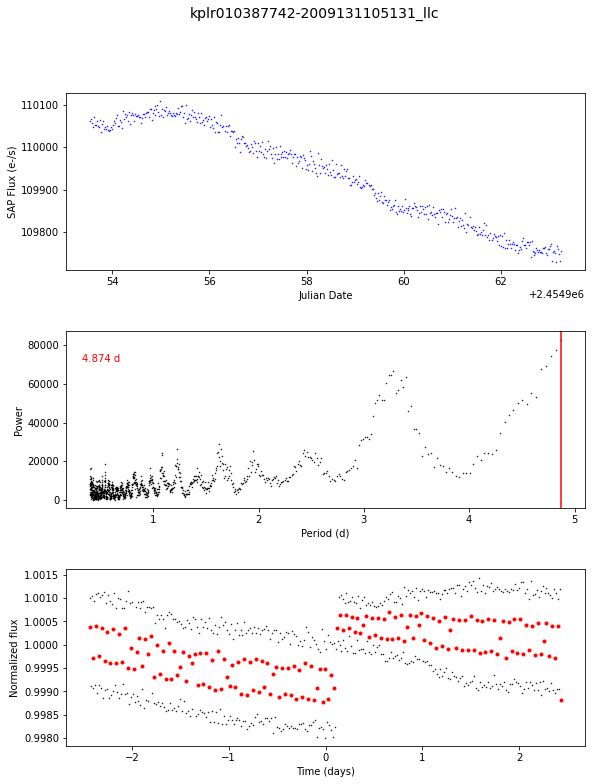

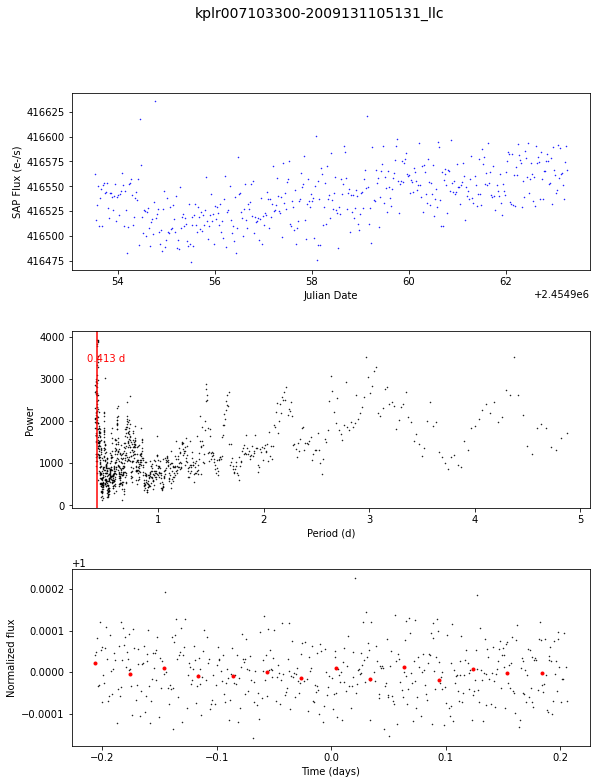

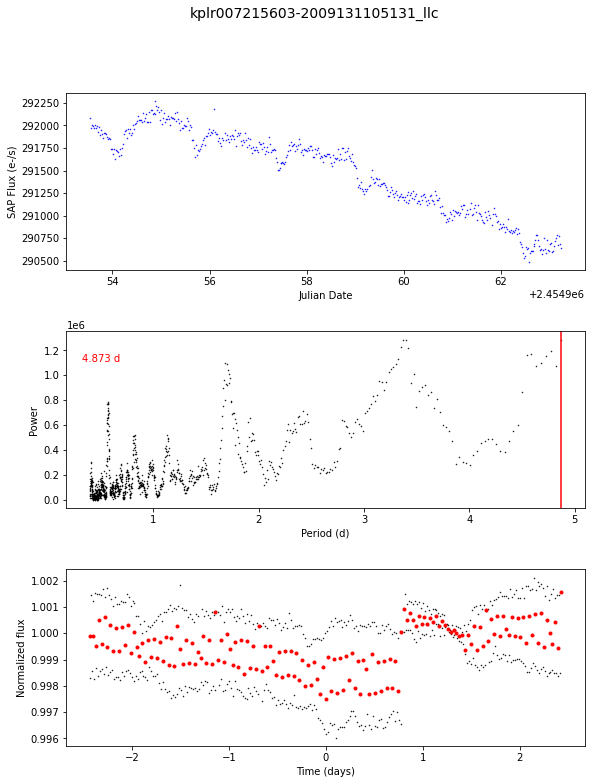

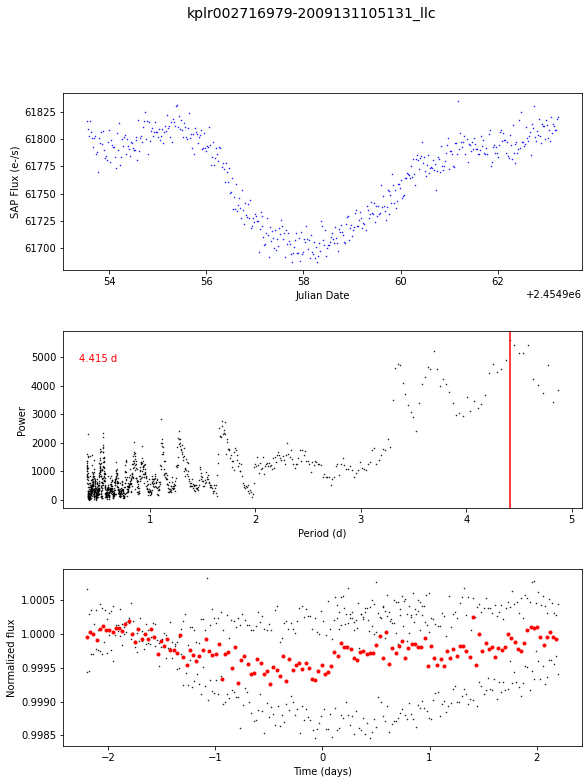

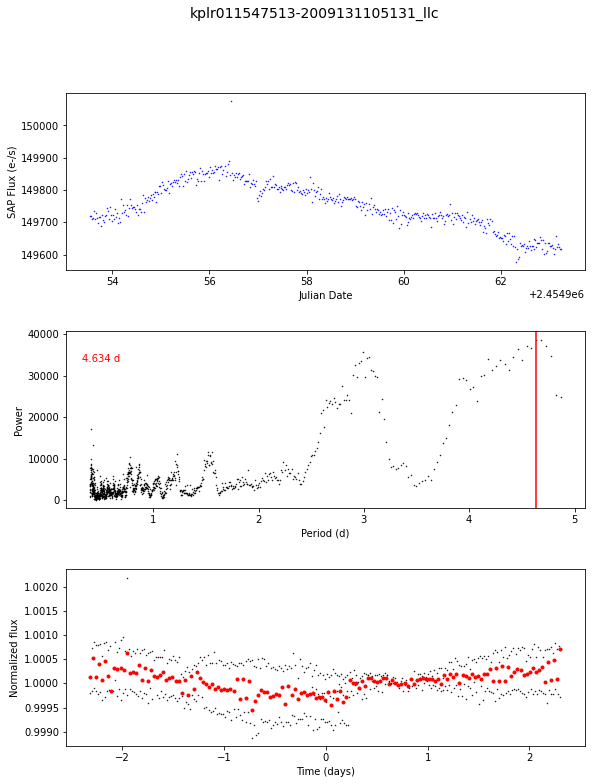

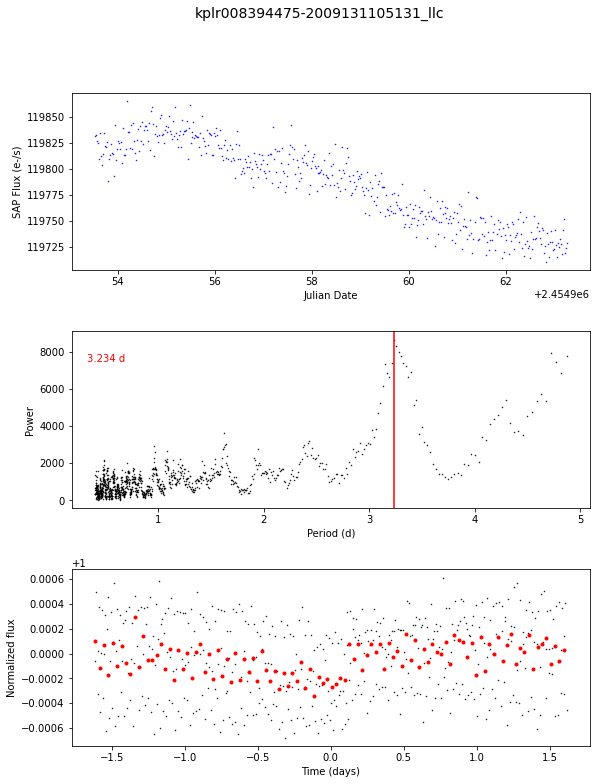

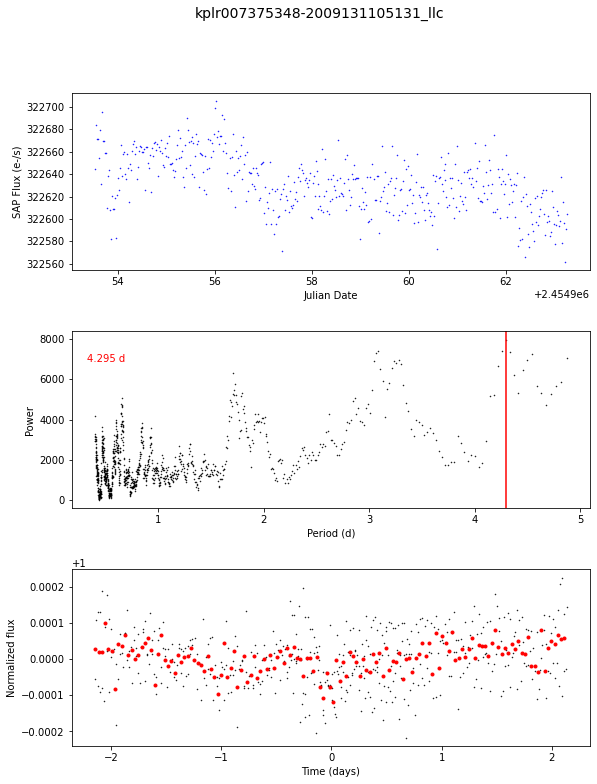

In [7]:
curves=0
freq = np.zeros((len(sample), 1))
dur = np.zeros((len(sample), 1))
amp = np.zeros((len(sample), 1))

i = 0
tempo = 1
for path, subdirs, files in os.walk(root):
    for name in sample: #changing "sample" by "files" explores the whole folder
        curves=curves+1
        file = [os.path.join(path, name)]
        str = " " 
        Ffile = (str.join(file))
        route = Path(name)
        Fname = route.with_suffix('')
        Fpng = route.with_suffix('.png')

#Graph
        filename = Ffile
        ts = TimeSeries.read(filename, format='kepler.fits')  
        
        fig, ax = plt.subplots(3, 1, figsize=(8, 12))
        fig.suptitle(Fname, size=14)
        fig.subplots_adjust(hspace=0.35, wspace=0.15, left=0.07, right=0.97)
        
        ax[0].plot(ts.time.jd, ts['sap_flux'], 'k.', markersize=1, color='blue')
        ax[0].set_xlabel('Julian Date')
        ax[0].set_ylabel('SAP Flux (e-/s)')
    
        
        model = BoxLeastSquares.from_timeseries(ts, 'sap_flux') 
        
        periodogram = model.autopower(0.2 * u.day)  
        max_samp = np.argmax(periodogram.power) 
        
        period = periodogram.period[max_samp]

        dyn = periodogram.power[max_samp]
        
        duration = periodogram.transit_time[max_samp]  

#To obtain a graphical representation of the light curve, its periodogram and folded curve, uncomment "plt.savefig('Spectra.png')"
          
        ax[1].plot(periodogram.period, periodogram.power, 'k.', markersize=1)
        ax[1].set_xlabel('Period (d)')
        ax[1].set_ylabel('Power')
        ax[1].axvline(period.value, color='r');
        ax[1].text(0.03,0.83,'{:.3f}'.format(period), transform=ax[1].transAxes, color='r') 
    
        transit_time = periodogram.transit_time[max_samp]  
        ts_folded = ts.fold(period=period, epoch_time=transit_time)  
        
        
        mean, median, stddev = sigma_clipped_stats(ts_folded['sap_flux'])  
        ts_folded['sap_flux_norm'] = ts_folded['sap_flux'] / median  
        
        ts_binned = aggregate_downsample(ts_folded, time_bin_size=0.03 * u.day) 
        
        ax[2].plot(ts_folded.time.jd, ts_folded['sap_flux_norm'], 'k.', markersize=1)
        ax[2].plot(ts_binned.time_bin_start.jd, ts_binned['sap_flux_norm'], 'r.', drawstyle='steps-post')
        ax[2].set_xlabel('Time (days)')
        ax[2].set_ylabel('Normalized flux')
#        plt.savefig('Spectra.png')
        
        freq[i] = (1/period)* 1000    #Fundamental frequency of each note
        amp[i] = dyn / 1000           #Amplitude of each note
        dur[i] = mean                 #Duration of each note
        i += 1
        
print ("KOI represented:",curves, "curves");

        

In [8]:
period

<Quantity 4.29513711 d>

In [9]:
dyn

<Quantity 7978.41593429 electron2 / s2>

In [10]:
duration

<Time object: scale='tdb' format='isot' value=2009-05-02T10:31:49.533>

In [11]:
freq

array([[ 207.35473752],
       [ 205.25043654],
       [ 222.18496515],
       [ 205.25328488],
       [ 294.34482102],
       [ 237.04768502],
       [ 315.62543301],
       [ 217.96918123],
       [ 215.85601305],
       [ 304.98037095],
       [ 298.64273292],
       [ 205.24272157],
       [ 209.4725238 ],
       [ 234.90651604],
       [ 211.59239154],
       [ 211.53151681],
       [ 205.18405228],
       [ 205.19124548],
       [ 211.59947416],
       [ 205.18094004],
       [ 205.24365499],
       [1466.1824695 ],
       [ 317.7101635 ],
       [ 205.23716279],
       [ 294.37442799],
       [ 205.24759909],
       [ 205.17861197],
       [ 264.67317097],
       [2215.53311411],
       [1222.05178899],
       [ 205.25066695],
       [ 222.16299438],
       [ 207.3704819 ],
       [ 228.5718352 ],
       [ 205.19452395],
       [ 205.22027342],
       [ 457.84974472],
       [ 239.17757924],
       [1812.19642353],
       [ 205.19763049],
       [ 305.00513544],
       [ 215.824

Duration=mean//////How to process amplitude in Music21?????

In [12]:
dur

array([[  89991.3203125 ],
       [ 223903.109375  ],
       [ 186312.828125  ],
       [ 389273.65625   ],
       [ 109644.15625   ],
       [ 128762.4140625 ],
       [ 108092.65625   ],
       [7154904.        ],
       [ 129232.171875  ],
       [  67028.5703125 ],
       [  63367.71484375],
       [  60073.640625  ],
       [ 108788.9296875 ],
       [  56027.58203125],
       [  64075.17578125],
       [ 149138.109375  ],
       [  86401.9375    ],
       [  53145.48828125],
       [  55928.80859375],
       [  48825.38671875],
       [  86820.8125    ],
       [  52346.96875   ],
       [ 176374.125     ],
       [ 185278.765625  ],
       [  56325.11328125],
       [ 173164.359375  ],
       [  68120.765625  ],
       [  72005.359375  ],
       [2458805.75      ],
       [ 480655.75      ],
       [ 129051.15625   ],
       [1166456.375     ],
       [ 328477.1875    ],
       [ 107880.9453125 ],
       [ 159286.46875   ],
       [  79710.3359375 ],
       [  59417.25390625],
 

In [13]:
amp

array([[2.19150460e+00],
       [8.61080152e+02],
       [2.20609335e+01],
       [2.83276925e+03],
       [4.52678985e+01],
       [1.15374828e+02],
       [4.89311901e+00],
       [5.09009127e+03],
       [7.58307752e+05],
       [1.78108654e+01],
       [1.74151064e+01],
       [1.80139682e+04],
       [2.76117495e+01],
       [1.15955580e+02],
       [3.11770828e+01],
       [1.03804100e+02],
       [2.13421010e+00],
       [3.16036447e+01],
       [5.56248635e+02],
       [3.76635551e+01],
       [1.16226285e+03],
       [1.29073641e+00],
       [3.59761132e+01],
       [3.18987673e+03],
       [4.12058518e+00],
       [2.62396736e+02],
       [1.40032260e+00],
       [2.08207468e+00],
       [3.59529514e+03],
       [3.67676822e+02],
       [2.87461841e+02],
       [3.14065277e+04],
       [4.16571374e+02],
       [5.64705987e+00],
       [3.39747448e+02],
       [3.76731551e+05],
       [1.42988353e+03],
       [1.18964541e+04],
       [1.59464861e+03],
       [6.48357697e+00],


In [14]:
dur_Mean = sigma_clipped_stats(dur)[0]
dur_Mean

137942.06793283045

In [15]:
amp_Stddev = sigma_clipped_stats(amp)[1]
amp_Stddev

38.741169669342916

## Logarithmic transformation of the amplitudes

In [16]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p, validate=True)
ampLog = transformer.transform(amp)

In [17]:
ampLog

array([[ 1.16049247],
       [ 6.75934825],
       [ 3.13814   ],
       [ 7.94936299],
       [ 3.83444838],
       [ 4.75681626],
       [ 1.7737854 ],
       [ 8.53524748],
       [13.53884591],
       [ 2.93443465],
       [ 2.91317133],
       [ 9.79895826],
       [ 3.35381746],
       [ 4.76179421],
       [ 3.47125448],
       [ 4.65209289],
       [ 1.14237718],
       [ 3.48442408],
       [ 6.32301152],
       [ 3.65489743],
       [ 7.05898413],
       [ 0.82887334],
       [ 3.61027211],
       [ 8.068051  ],
       [ 1.63326873],
       [ 5.5736614 ],
       [ 0.87560315],
       [ 1.12560297],
       [ 8.18765947],
       [ 5.90992044],
       [ 5.66456281],
       [10.35480288],
       [ 6.03445548],
       [ 1.89417463],
       [ 5.83114158],
       [12.8392908 ],
       [ 7.26604739],
       [ 9.38407971],
       [ 7.37503558],
       [ 2.01271088],
       [ 3.43196086],
       [ 3.62491028],
       [ 9.63547674],
       [ 1.00402446],
       [11.32408132],
       [ 5

## Normalization

In [18]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
amp_OK = np.round(min_max_scaler.fit_transform(ampLog)*127)

In [19]:
amp_OK = amp_OK.astype(int)

In [20]:
amp_OK

array([[  6],
       [ 56],
       [ 23],
       [ 66],
       [ 29],
       [ 38],
       [ 11],
       [ 71],
       [116],
       [ 21],
       [ 21],
       [ 83],
       [ 25],
       [ 38],
       [ 26],
       [ 37],
       [  5],
       [ 26],
       [ 52],
       [ 28],
       [ 58],
       [  3],
       [ 27],
       [ 67],
       [ 10],
       [ 45],
       [  3],
       [  5],
       [ 68],
       [ 48],
       [ 46],
       [ 88],
       [ 49],
       [ 12],
       [ 47],
       [110],
       [ 60],
       [ 79],
       [ 61],
       [ 13],
       [ 26],
       [ 28],
       [ 81],
       [  4],
       [ 96],
       [ 46],
       [ 57],
       [ 36],
       [ 31],
       [ 29],
       [ 99],
       [ 41],
       [ 29],
       [  8],
       [ 27],
       [ 32],
       [ 37],
       [ 19],
       [ 21],
       [ 22],
       [127],
       [  0],
       [ 19],
       [ 36],
       [ 21],
       [ 24],
       [ 89],
       [127],
       [  2],
       [ 60],
       [ 39],
      

In [21]:
for j in range (len(amp_OK)):
    if amp_OK[j] == 0:
        amp_OK[j] = 1

In [22]:
amp_OK

array([[  6],
       [ 56],
       [ 23],
       [ 66],
       [ 29],
       [ 38],
       [ 11],
       [ 71],
       [116],
       [ 21],
       [ 21],
       [ 83],
       [ 25],
       [ 38],
       [ 26],
       [ 37],
       [  5],
       [ 26],
       [ 52],
       [ 28],
       [ 58],
       [  3],
       [ 27],
       [ 67],
       [ 10],
       [ 45],
       [  3],
       [  5],
       [ 68],
       [ 48],
       [ 46],
       [ 88],
       [ 49],
       [ 12],
       [ 47],
       [110],
       [ 60],
       [ 79],
       [ 61],
       [ 13],
       [ 26],
       [ 28],
       [ 81],
       [  4],
       [ 96],
       [ 46],
       [ 57],
       [ 36],
       [ 31],
       [ 29],
       [ 99],
       [ 41],
       [ 29],
       [  8],
       [ 27],
       [ 32],
       [ 37],
       [ 19],
       [ 21],
       [ 22],
       [127],
       [  1],
       [ 19],
       [ 36],
       [ 21],
       [ 24],
       [ 89],
       [127],
       [  2],
       [ 60],
       [ 39],
      

In [23]:
curves

100

## Score generation

In [24]:
from music21 import *

In [25]:
s = stream.Stream()
n = 120
s.append(tempo.MetronomeMark(number=n))

for k in range(curves):
    exec(f'n{k} = note.Note()')

In [26]:
A4 = 440
C0 = A4*pow(2, -4.75)
name = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
    
def pitch(f):
    h = round(12*log2(f/C0))
    octave = h // 12
    n = h % 12
    return name[n]# + str(octave)

In [27]:
pitch(440)

'A'

In [28]:
durations = ["whole","half", "quarter", "eighth"]#, "16th"]#, "32nd", "64th"]
for i in range(curves):
    if dur[i] >= (dur_Mean * 2):
        figure = durations[0]
    if (dur[i] >= dur_Mean) and (dur[i] < dur_Mean * 2):
        figure = durations[1]
    if (dur[i] > dur_Mean / 2) and (dur[i] <= dur_Mean):
        figure = durations[2]
    if dur[i] <= (dur_Mean / 2):
        figure = durations[3]
   
    exec(f'n{i}.pitch.name = pitch(freq[i])')
    exec(f'n{i}.duration.type = figure')

In [29]:
#velocities
for j in range(curves):
    amplitude = amp_OK[j][0]
    exec(f'n{j}.volume.velocity = amplitude')

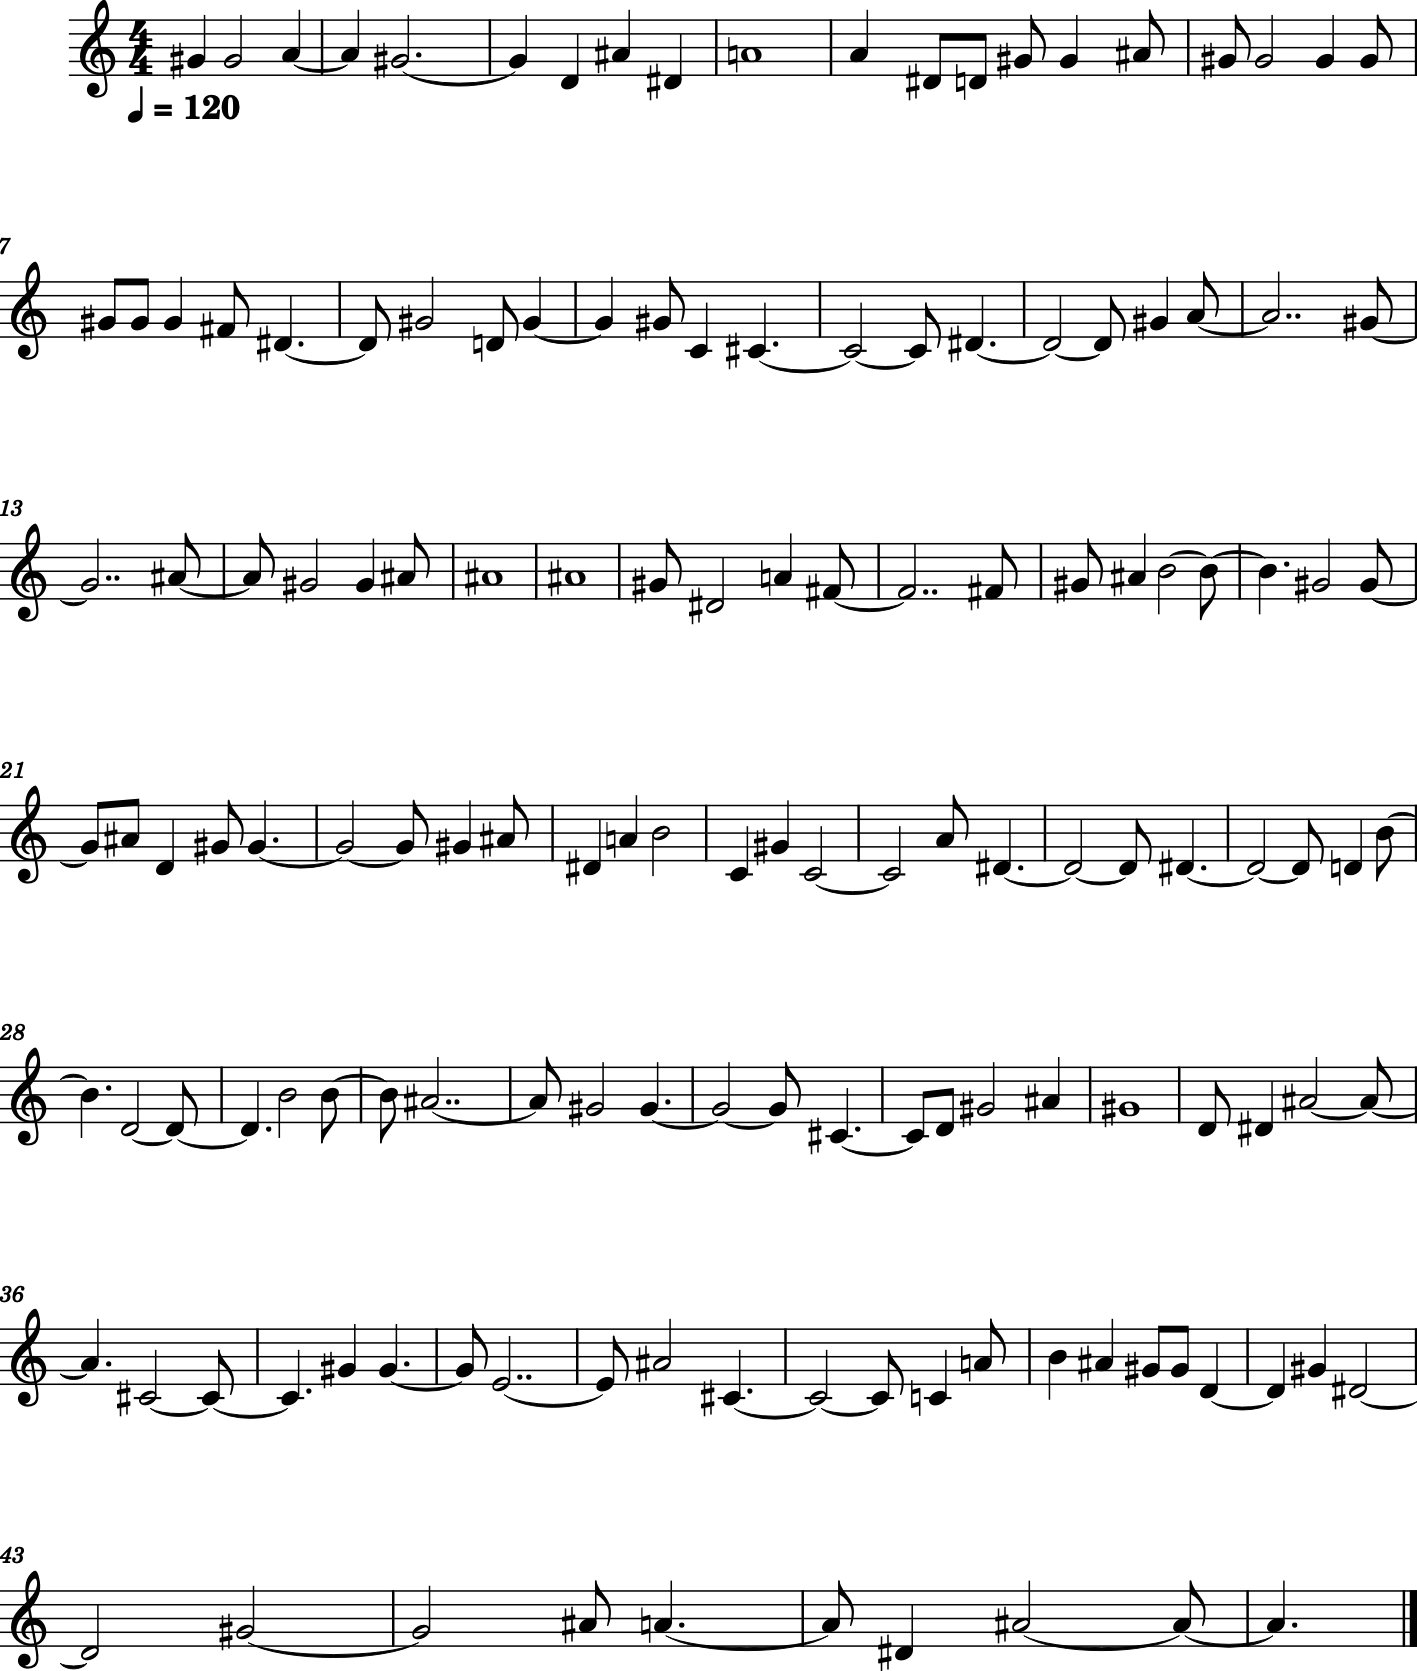

In [30]:
for j in range(curves):
    exec(f's.append(n{j})')
s.show()

In [31]:
s.show('midi')

In [32]:
s.show('musicxml')

In [2]:
import session_info
session_info.show()